In [ ]:
# Import the required libraries

import numpy as np
%pip install plotly==5.8.0
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from google.colab import files
%pip install kaleido
import kaleido
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

pio.renderers.default = "svg"

In [ ]:
# Webscraping to excel method is used to scrap the dataset from link https://alternative-fuels-observatory.ec.europa.eu/consumer-portal/available-electric-vehicle-models.
# After webscraping the dataset structure it by various methods and save. Now load the dataset in the google colab.
#Data consists of
#1. Categorical column-Brand, Model
#2. DateTime Column-Available from
#3. Numeric Column-Range_km,Battery size_kWh,Efficiency_kWh/100km,Fastcharge speed_km/h,Price (inEuro)
data=pd.read_excel("/content/ev file60.xlsx")

In [ ]:
data

Brand                           Model Available from  Range_km  \
0   Abarth 500e                     Convertible     2023-05-01       225   
1   Abarth 500e                       Hatchback     2023-05-01       225   
2        Aiways                              U5     2022-04-01       315   
3        Aiways                              U6     2022-12-01       350   
4          Audi               e-tron GT quattro     2021-03-01       420   
5          Audi                    e-tron GT RS     2021-03-01       405   
6          Audi                    Q4 e-tron 35     2021-06-01       285   
7          Audi                    Q4 e-tron 40     2021-06-01       405   
8          Audi            Q4 e-tron 45 quattro     2021-08-01       385   
9          Audi            Q4 e-tron 50 quattro     2021-07-01       385   
10         Audi          Q4 Sportback e-tron 35     2021-08-01       295   
11         Audi          Q4 Sportback e-tron 40     2021-08-01       425   
12         Audi  Q4 Sportback e-tron 45 quattro     2022-07-01       400   
13         Audi  Q4 Sportback e-tron 50 quattro     2021-08-01       400   
14         Audi            Q8 e-tron 50 quattro     2022-12-01       420   
15         Audi            Q8 e-tron 55 quattro     2022-12-01       495   
16         Audi  Q8 e-tron Sportback 50 quattro     2022-12-01       445   
17         Audi  Q8 e-tron Sportback 55 quattro     2022-12-01       525   
18         Audi                      SQ8 e-tron     2023-05-01       455   
19         Audi            SQ8 e-tron Sportback     2023-05-01       480   
20          BMW                     i4 eDrive35     2022-11-01       430   
21          BMW                     i4 eDrive40     2021-11-01       515   
22          BMW                          i4 M50     2021-11-01       450   
23          BMW               i5 eDrive40 Sedan     2023-05-01       475   
24          BMW             i5 M60 xDrive Sedan     2023-05-01       425   
25          BMW                     i7 eDrive50     2023-05-01       520   
26          BMW                   i7 M70 xDrive     2023-05-01       490   
27          BMW                     i7 xDrive60     2022-11-01       510   
28          BMW                          iX M60     2022-04-01       485   
29          BMW                     iX xDrive40     2021-10-01       360   
30          BMW                     iX xDrive50     2021-11-01       505   
31          BMW                    iX1 xDrive30     2022-11-01       370   
32          BMW                             iX3     2021-09-01       385   
33          BYD                          ATTO 3     2022-08-01       325   
34          BYD                DOLPHIN 60.4 kWh     2023-07-01       340   
35          BYD                             HAN     2023-03-01       475   
36          BYD                            TANG     2022-08-01       360   
37      Citroen             e-Berlingo M 50 kWh     2021-09-01       205   
38      Citroen            e-Berlingo XL 50 kWh     2021-09-01       205   
39      Citroen                            e-C4     2021-11-01       290   
40      Citroen                     e-C4 54 kWh     2023-06-01       320   
41      Citroen                          e-C4 X     2022-11-01       275   
42      Citroen                   e-C4 X 54 kWh     2023-06-01       305   
43      Citroen          e-Jumpy Combi M 50 kWh     2020-11-01       185   
44      Citroen          e-Jumpy Combi M 75 kWh     2020-11-01       265   
45      Citroen         e-Jumpy Combi XL 50 kWh     2020-11-01       180   
46      Citroen         e-Jumpy Combi XL 75 kWh     2020-11-01       260   
47      Citroen          e-SpaceTourer M 50 kWh     2020-11-01       185   
48      Citroen          e-SpaceTourer M 75 kWh     2021-02-01       265   
49      Citroen         e-SpaceTourer XL 50 kWh     2020-11-01       180   
50      Citroen         e-SpaceTourer XL 75 kWh     2021-02-01       260   
51        CUPRA            Born 150 kW - 58 kWh     2021-1

In [ ]:
# Print the top 5 rows of dataset
data.head(5)

Brand              Model Available from  Range_km  Battery size_kWh  \
0  Abarth 500e        Convertible     2023-05-01       225           37.8000   
1  Abarth 500e          Hatchback     2023-05-01       225           37.8000   
2       Aiways                 U5     2022-04-01       315           60.0000   
3       Aiways                 U6     2022-12-01       350           60.0000   
4         Audi  e-tron GT quattro     2021-03-01       420           85.0000   

   Efficiency_kWh/100km  Fastcharge speed_km/h  Price (inEuro)  
0                    17               370.0000           41200  
1                    17               370.0000           38200  
2                    19               380.0000           41300  
3                    17               430.0000           48300  
4                    20              1030.0000          108600

In [ ]:
# Finding the shape (rows,columns)
data.shape

(60, 8)

In [ ]:
# Info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Brand                  60 non-null     object        
 1   Model                  60 non-null     object        
 2   Available from         60 non-null     datetime64[ns]
 3   Range_km               60 non-null     int64         
 4   Battery size_kWh       60 non-null     float64       
 5   Efficiency_kWh/100km   60 non-null     int64         
 6   Fastcharge speed_km/h  59 non-null     float64       
 7   Price (inEuro)         60 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 3.9+ KB


In [ ]:
# Statistics of the dataset
data.describe()

Range_km  Battery size_kWh  Efficiency_kWh/100km  \
count   60.0000           60.0000               60.0000   
mean   347.1667           67.7233               19.7000   
std    111.6569           23.0084                3.1424   
min    135.0000           21.3000               15.0000   
25%    263.7500           49.6750               17.0000   
50%    355.0000           68.0000               19.0000   
75%    433.7500           82.1500               21.0000   
max    525.0000          106.0000               26.0000   

       Fastcharge speed_km/h  Price (inEuro)  
count                59.0000         60.0000  
mean                499.1525      65176.6667  
std                 188.9653      32414.3898  
min                 170.0000      22200.0000  
25%                 350.0000      43525.0000  
50%                 470.0000      57600.0000  
75%                 630.0000      73825.0000  
max                1030.0000     185800.0000

In [ ]:
# Find the null values
data.isnull().sum()

Brand                    0
Model                    0
Available from           0
Range_km                 0
Battery size_kWh         0
Efficiency_kWh/100km     0
Fastcharge speed_km/h    1
Price (inEuro)           0
dtype: int64

In [ ]:
# Fill the null values
data['Fastcharge speed_km/h'].fillna(0,inplace=True)

In [ ]:
# Reload the dataset
data

Brand                           Model Available from  Range_km  \
0   Abarth 500e                     Convertible     2023-05-01       225   
1   Abarth 500e                       Hatchback     2023-05-01       225   
2        Aiways                              U5     2022-04-01       315   
3        Aiways                              U6     2022-12-01       350   
4          Audi               e-tron GT quattro     2021-03-01       420   
5          Audi                    e-tron GT RS     2021-03-01       405   
6          Audi                    Q4 e-tron 35     2021-06-01       285   
7          Audi                    Q4 e-tron 40     2021-06-01       405   
8          Audi            Q4 e-tron 45 quattro     2021-08-01       385   
9          Audi            Q4 e-tron 50 quattro     2021-07-01       385   
10         Audi          Q4 Sportback e-tron 35     2021-08-01       295   
11         Audi          Q4 Sportback e-tron 40     2021-08-01       425   
12         Audi  Q4 Sportback e-tron 45 quattro     2022-07-01       400   
13         Audi  Q4 Sportback e-tron 50 quattro     2021-08-01       400   
14         Audi            Q8 e-tron 50 quattro     2022-12-01       420   
15         Audi            Q8 e-tron 55 quattro     2022-12-01       495   
16         Audi  Q8 e-tron Sportback 50 quattro     2022-12-01       445   
17         Audi  Q8 e-tron Sportback 55 quattro     2022-12-01       525   
18         Audi                      SQ8 e-tron     2023-05-01       455   
19         Audi            SQ8 e-tron Sportback     2023-05-01       480   
20          BMW                     i4 eDrive35     2022-11-01       430   
21          BMW                     i4 eDrive40     2021-11-01       515   
22          BMW                          i4 M50     2021-11-01       450   
23          BMW               i5 eDrive40 Sedan     2023-05-01       475   
24          BMW             i5 M60 xDrive Sedan     2023-05-01       425   
25          BMW                     i7 eDrive50     2023-05-01       520   
26          BMW                   i7 M70 xDrive     2023-05-01       490   
27          BMW                     i7 xDrive60     2022-11-01       510   
28          BMW                          iX M60     2022-04-01       485   
29          BMW                     iX xDrive40     2021-10-01       360   
30          BMW                     iX xDrive50     2021-11-01       505   
31          BMW                    iX1 xDrive30     2022-11-01       370   
32          BMW                             iX3     2021-09-01       385   
33          BYD                          ATTO 3     2022-08-01       325   
34          BYD                DOLPHIN 60.4 kWh     2023-07-01       340   
35          BYD                             HAN     2023-03-01       475   
36          BYD                            TANG     2022-08-01       360   
37      Citroen             e-Berlingo M 50 kWh     2021-09-01       205   
38      Citroen            e-Berlingo XL 50 kWh     2021-09-01       205   
39      Citroen                            e-C4     2021-11-01       290   
40      Citroen                     e-C4 54 kWh     2023-06-01       320   
41      Citroen                          e-C4 X     2022-11-01       275   
42      Citroen                   e-C4 X 54 kWh     2023-06-01       305   
43      Citroen          e-Jumpy Combi M 50 kWh     2020-11-01       185   
44      Citroen          e-Jumpy Combi M 75 kWh     2020-11-01       265   
45      Citroen         e-Jumpy Combi XL 50 kWh     2020-11-01       180   
46      Citroen         e-Jumpy Combi XL 75 kWh     2020-11-01       260   
47      Citroen          e-SpaceTourer M 50 kWh     2020-11-01       185   
48      Citroen          e-SpaceTourer M 75 kWh     2021-02-01       265   
49      Citroen         e-SpaceTourer XL 50 kWh     2020-11-01       180   
50      Citroen         e-SpaceTourer XL 75 kWh     2021-02-01       260   
51        CUPRA            Born 150 kW - 58 kWh     2021-1

In [ ]:
# Recheck the null values
data.isnull().sum()

Brand                    0
Model                    0
Available from           0
Range_km                 0
Battery size_kWh         0
Efficiency_kWh/100km     0
Fastcharge speed_km/h    0
Price (inEuro)           0
dtype: int64

In [ ]:
# Drop duplicates
df=data.drop_duplicates()
df

Brand                           Model Available from  Range_km  \
0   Abarth 500e                     Convertible     2023-05-01       225   
1   Abarth 500e                       Hatchback     2023-05-01       225   
2        Aiways                              U5     2022-04-01       315   
3        Aiways                              U6     2022-12-01       350   
4          Audi               e-tron GT quattro     2021-03-01       420   
5          Audi                    e-tron GT RS     2021-03-01       405   
6          Audi                    Q4 e-tron 35     2021-06-01       285   
7          Audi                    Q4 e-tron 40     2021-06-01       405   
8          Audi            Q4 e-tron 45 quattro     2021-08-01       385   
9          Audi            Q4 e-tron 50 quattro     2021-07-01       385   
10         Audi          Q4 Sportback e-tron 35     2021-08-01       295   
11         Audi          Q4 Sportback e-tron 40     2021-08-01       425   
12         Audi  Q4 Sportback e-tron 45 quattro     2022-07-01       400   
13         Audi  Q4 Sportback e-tron 50 quattro     2021-08-01       400   
14         Audi            Q8 e-tron 50 quattro     2022-12-01       420   
15         Audi            Q8 e-tron 55 quattro     2022-12-01       495   
16         Audi  Q8 e-tron Sportback 50 quattro     2022-12-01       445   
17         Audi  Q8 e-tron Sportback 55 quattro     2022-12-01       525   
18         Audi                      SQ8 e-tron     2023-05-01       455   
19         Audi            SQ8 e-tron Sportback     2023-05-01       480   
20          BMW                     i4 eDrive35     2022-11-01       430   
21          BMW                     i4 eDrive40     2021-11-01       515   
22          BMW                          i4 M50     2021-11-01       450   
23          BMW               i5 eDrive40 Sedan     2023-05-01       475   
24          BMW             i5 M60 xDrive Sedan     2023-05-01       425   
25          BMW                     i7 eDrive50     2023-05-01       520   
26          BMW                   i7 M70 xDrive     2023-05-01       490   
27          BMW                     i7 xDrive60     2022-11-01       510   
28          BMW                          iX M60     2022-04-01       485   
29          BMW                     iX xDrive40     2021-10-01       360   
30          BMW                     iX xDrive50     2021-11-01       505   
31          BMW                    iX1 xDrive30     2022-11-01       370   
32          BMW                             iX3     2021-09-01       385   
33          BYD                          ATTO 3     2022-08-01       325   
34          BYD                DOLPHIN 60.4 kWh     2023-07-01       340   
35          BYD                             HAN     2023-03-01       475   
36          BYD                            TANG     2022-08-01       360   
37      Citroen             e-Berlingo M 50 kWh     2021-09-01       205   
38      Citroen            e-Berlingo XL 50 kWh     2021-09-01       205   
39      Citroen                            e-C4     2021-11-01       290   
40      Citroen                     e-C4 54 kWh     2023-06-01       320   
41      Citroen                          e-C4 X     2022-11-01       275   
42      Citroen                   e-C4 X 54 kWh     2023-06-01       305   
43      Citroen          e-Jumpy Combi M 50 kWh     2020-11-01       185   
44      Citroen          e-Jumpy Combi M 75 kWh     2020-11-01       265   
45      Citroen         e-Jumpy Combi XL 50 kWh     2020-11-01       180   
46      Citroen         e-Jumpy Combi XL 75 kWh     2020-11-01       260   
47      Citroen          e-SpaceTourer M 50 kWh     2020-11-01       185   
48      Citroen          e-SpaceTourer M 75 kWh     2021-02-01       265   
49      Citroen         e-SpaceTourer XL 50 kWh     2020-11-01       180   
50      Citroen         e-SpaceTourer XL 75 kWh     2021-02-01       260   
51        CUPRA            Born 150 kW - 58 kWh     2021-1

In [ ]:
# Count unique values
data.value_counts()

Brand        Model                           Available from  Range_km  Battery size_kWh  Efficiency_kWh/100km  Fastcharge speed_km/h  Price (inEuro)
Abarth 500e  Convertible                     2023-05-01      225       37.8000           17                    370.0000               41200             1
             Hatchback                       2023-05-01      225       37.8000           17                    370.0000               38200             1
BMW          iX3                             2021-09-01      385       74.0000           19                    520.0000               69400             1
BYD          ATTO 3                          2022-08-01      325       60.5000           19                    360.0000               43800             1
             DOLPHIN 60.4 kWh                2023-07-01      340       60.5000           18                    340.0000               36400             1
             HAN                             2023-03-01      475       85.4000   

In [ ]:
# Count unique values and plot EDA
# Pie plot

Text(0.5, 1.0, 'Brand')

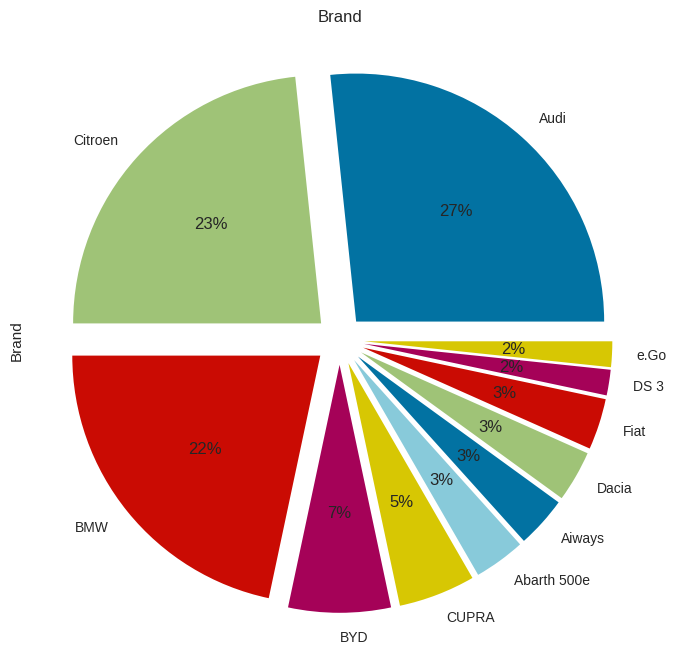

In [ ]:
# Brand of Car
data['Brand'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Brand')

Text(0.5, 1.0, 'Model')

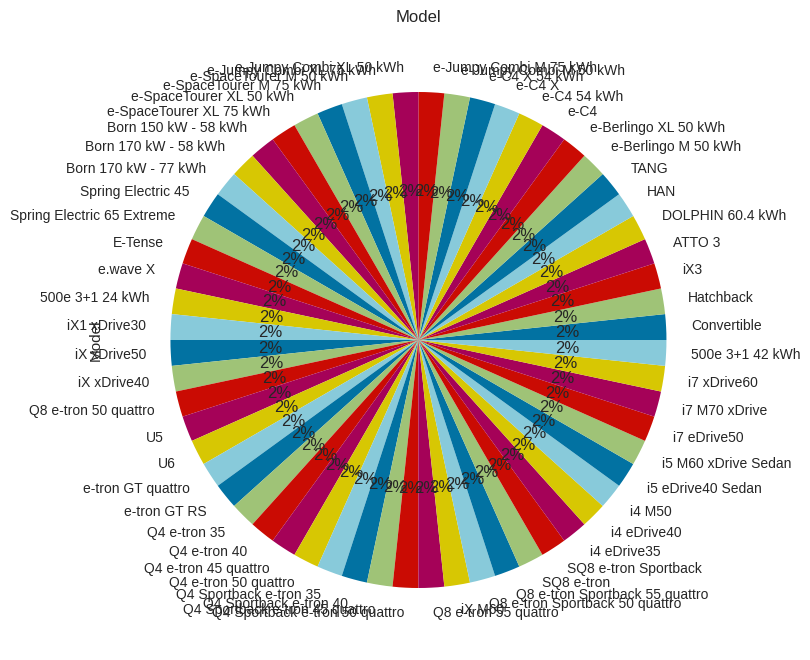

In [ ]:
# EDA Model of Car
data['Model'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%')
plt.title('Model')

Text(0.5, 1.0, 'Available from')

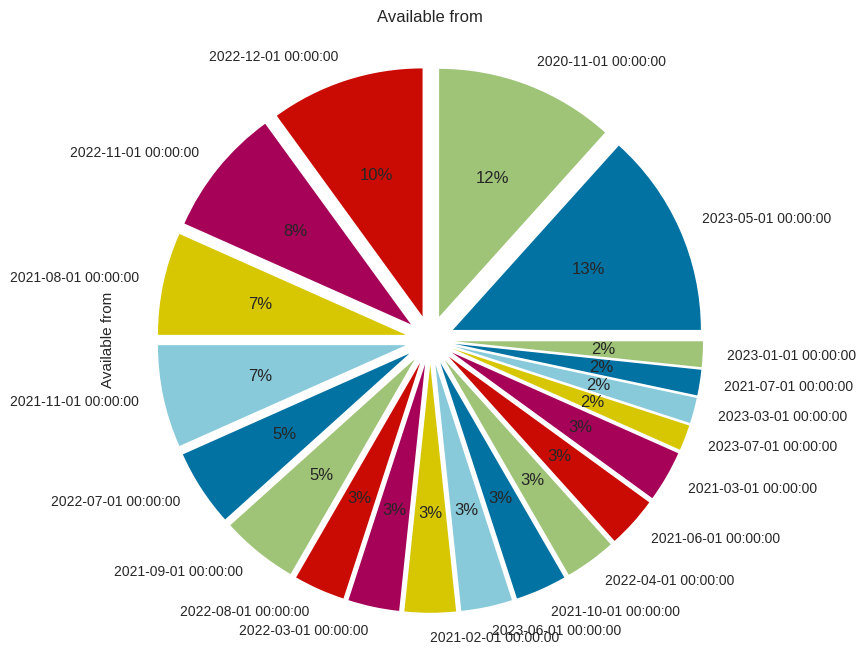

In [ ]:
# Availability from of the Car
data['Available from'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Available from')

Text(0.5, 1.0, 'Battery Size')

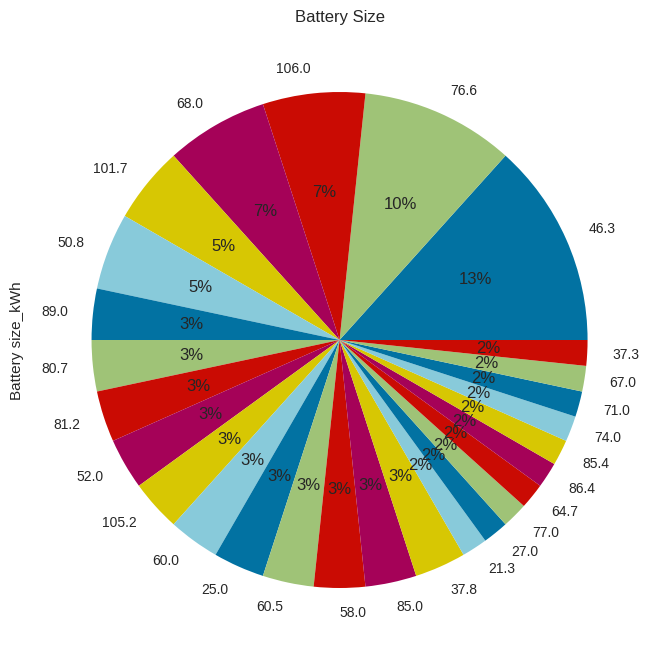

In [ ]:
# Battery size of Car
data['Battery size_kWh'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%')
plt.title('Battery Size')

Text(0.5, 1.0, 'Efficiency')

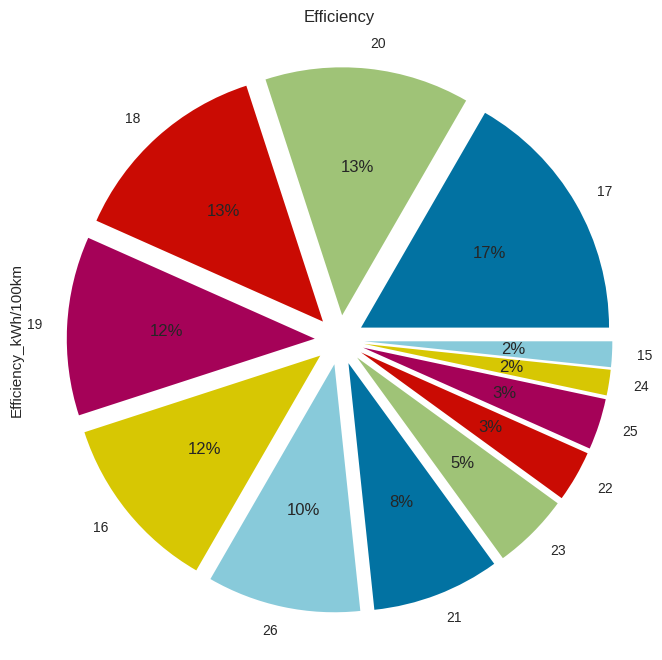

In [ ]:
# Efficiency of Car
data['Efficiency_kWh/100km'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Efficiency')

Text(0.5, 1.0, 'Fastcharge Speed')

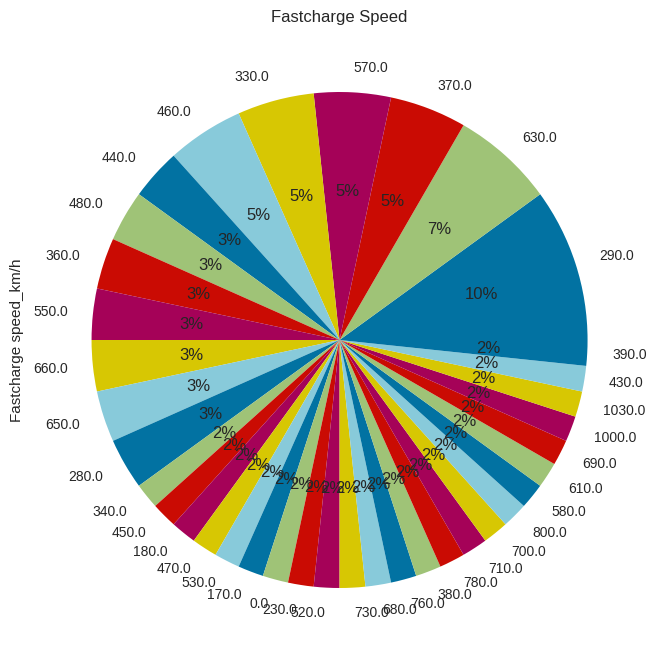

In [ ]:
# Speed of Car
data['Fastcharge speed_km/h'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%')
plt.title('Fastcharge Speed')

Text(0.5, 1.0, 'Price (in Euro)')

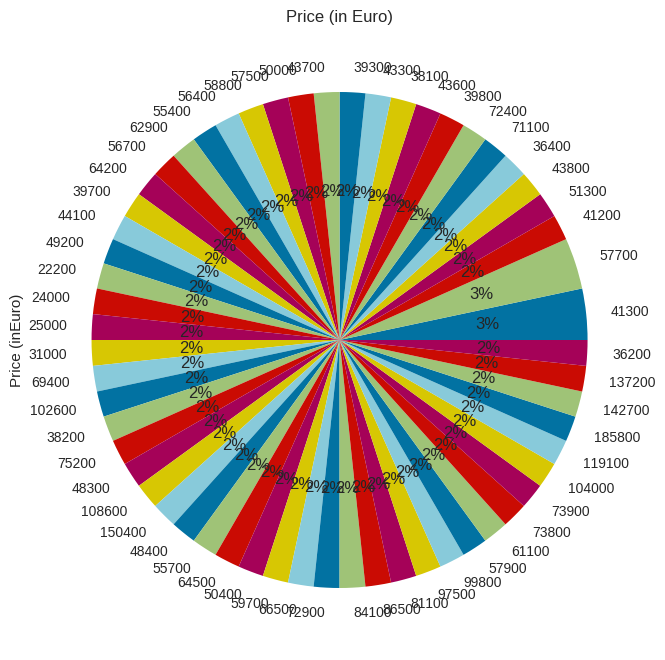

In [ ]:
# Price of Car(in Euro)
data['Price (inEuro)'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%')
plt.title('Price (in Euro)')

Text(0.5, 1.0, 'Range')

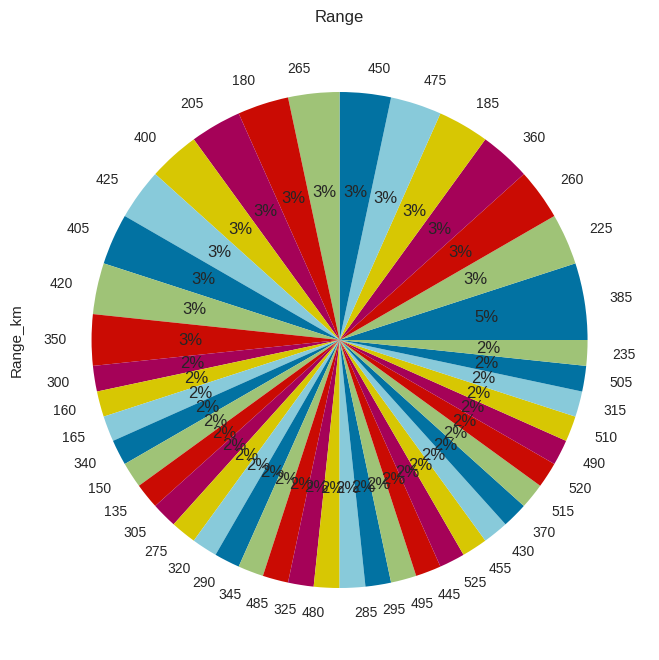

In [ ]:
# Range of car
data['Range_km'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%')
plt.title('Range')

In [ ]:
# Install Pandas-profiling

!pip install pandas-profiling

In [ ]:
# Summarize the dataset
# Output.html report shows one-line EDA

from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# EDA using Bar Plot

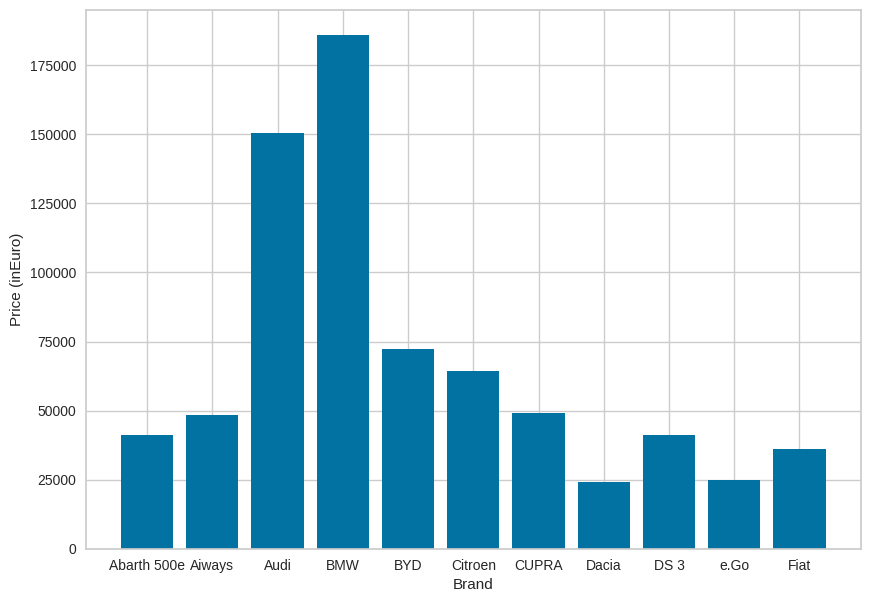

In [ ]:
# EDA between Brand and Price
fig = plt.figure(figsize =(10, 7))
plt.bar(data['Brand'],data['Price (inEuro)'])
plt.xlabel('Brand')
plt.ylabel('Price (inEuro)')
plt.show()

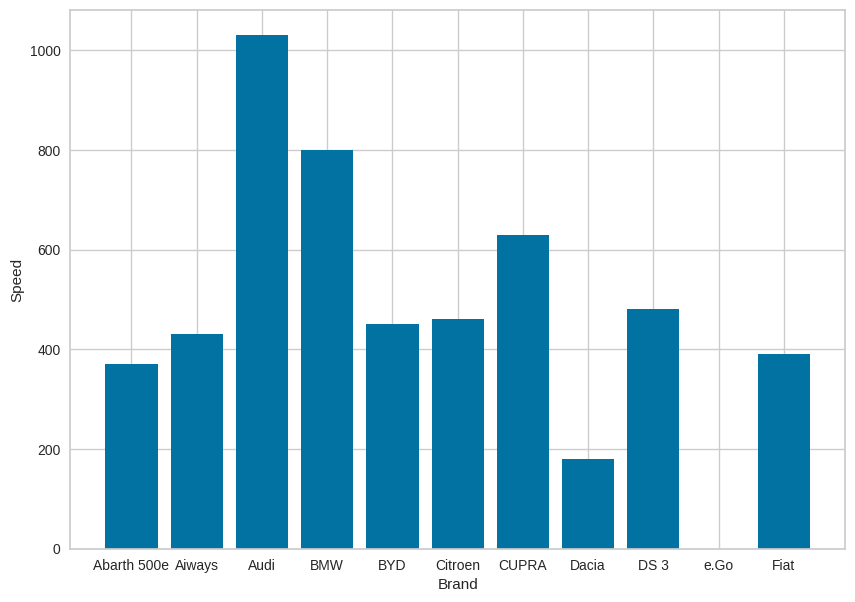

In [ ]:
# EDA between Brand and Speed
fig = plt.figure(figsize =(10, 7))
plt.bar(data['Brand'],data['Fastcharge speed_km/h'])
plt.xlabel('Brand')
plt.ylabel('Speed')
plt.show()

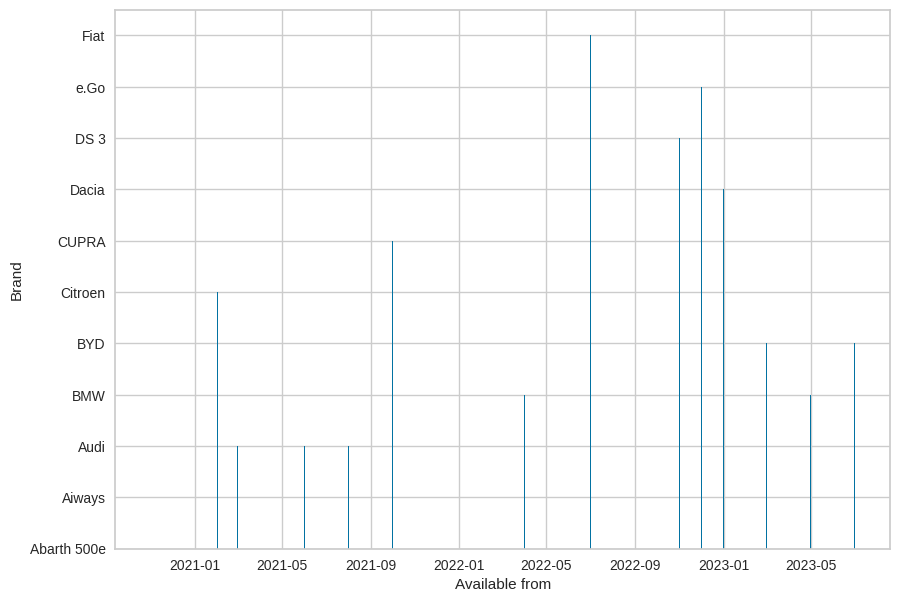

In [ ]:
# EDA between Availability from and Brand
fig = plt.figure(figsize =(10, 7))
plt.bar(data['Available from'],data['Brand'])
plt.xlabel('Available from')
plt.ylabel('Brand')
plt.show()

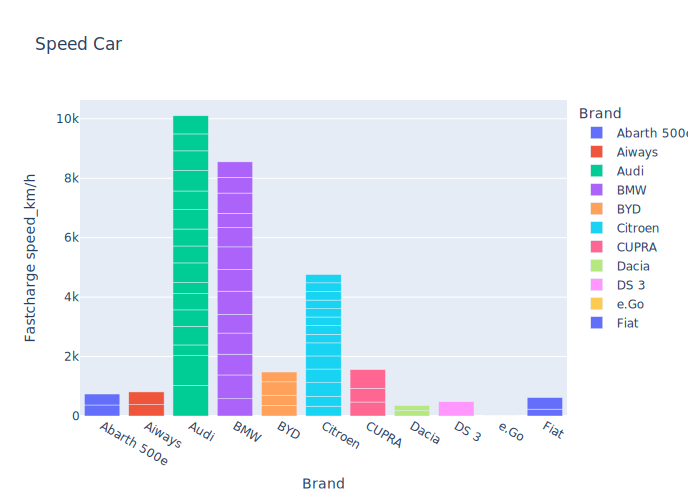

In [ ]:
# Bar plot between Brand and Fastcharge speed_km/h
fig = px.bar(data,x='Brand',y = 'Fastcharge speed_km/h',color = 'Brand',title = 'Speed Car',labels = {'x':'Brand','y':'Fastcharge speed_km/h'})
pio.show(fig)

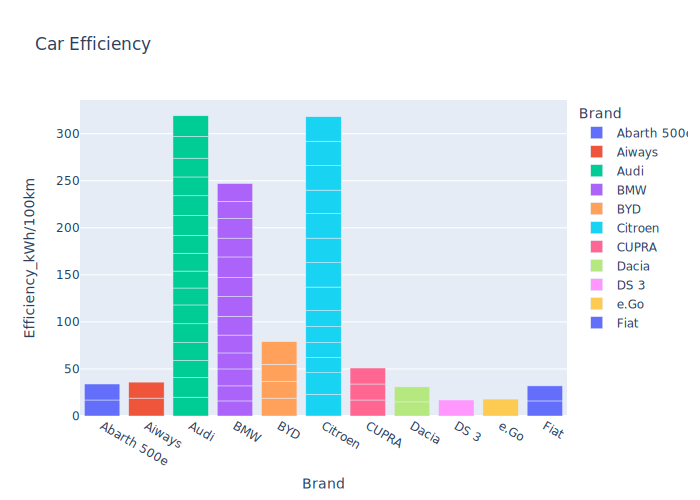

In [ ]:
# Bar plot between Brand and Efficiency
fig = px.bar(df,x='Brand',y = 'Efficiency_kWh/100km',color = 'Brand',title = 'Car Efficiency',labels = {'x':'Car Brands','y':'Efficiency_kWh/100km'})
pio.show(fig)

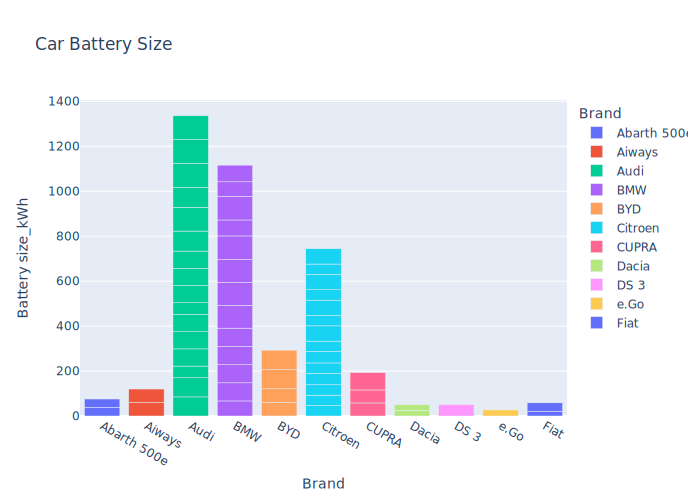

In [ ]:
# Bar plot between Brand and Battery Size
fig = px.bar(data,x='Brand',y = 'Battery size_kWh',color = 'Brand',title='Car Battery Size',labels = {'x':'Car Brands','y':'Battery size_kWh'})
pio.show(fig)

<Axes: title={'center': 'Car Price'}, xlabel='Samples', ylabel='Car Price'>

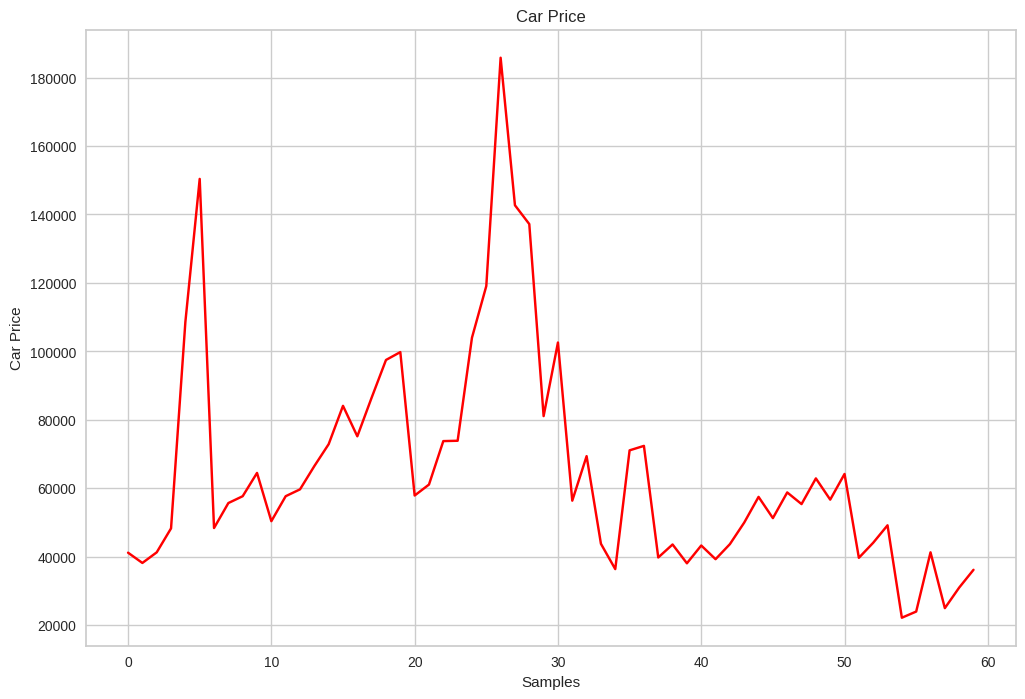

In [ ]:
# EDA for Car Price
data['Price (inEuro)'].plot(figsize = (12,8),title='Car Price',xlabel = 'Samples',ylabel = 'Car Price',color = 'red')

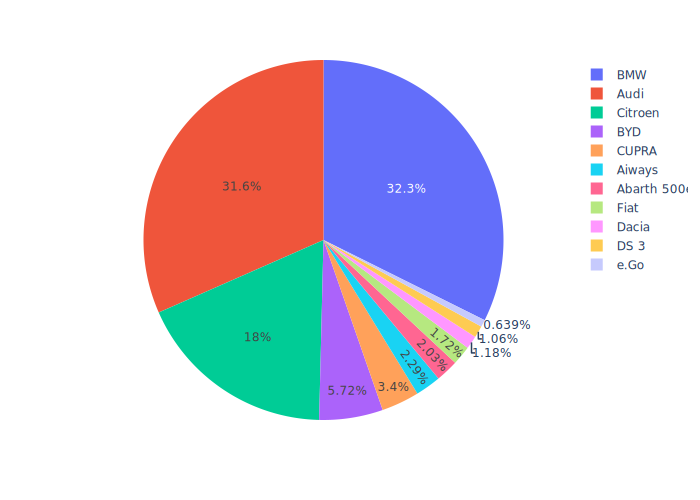

In [ ]:
# Pie Plot Brand and Price
fig = px.pie(data,names = 'Brand',values = 'Price (inEuro)')
pio.show(fig)

<Axes: xlabel='Battery size_kWh', ylabel='count'>

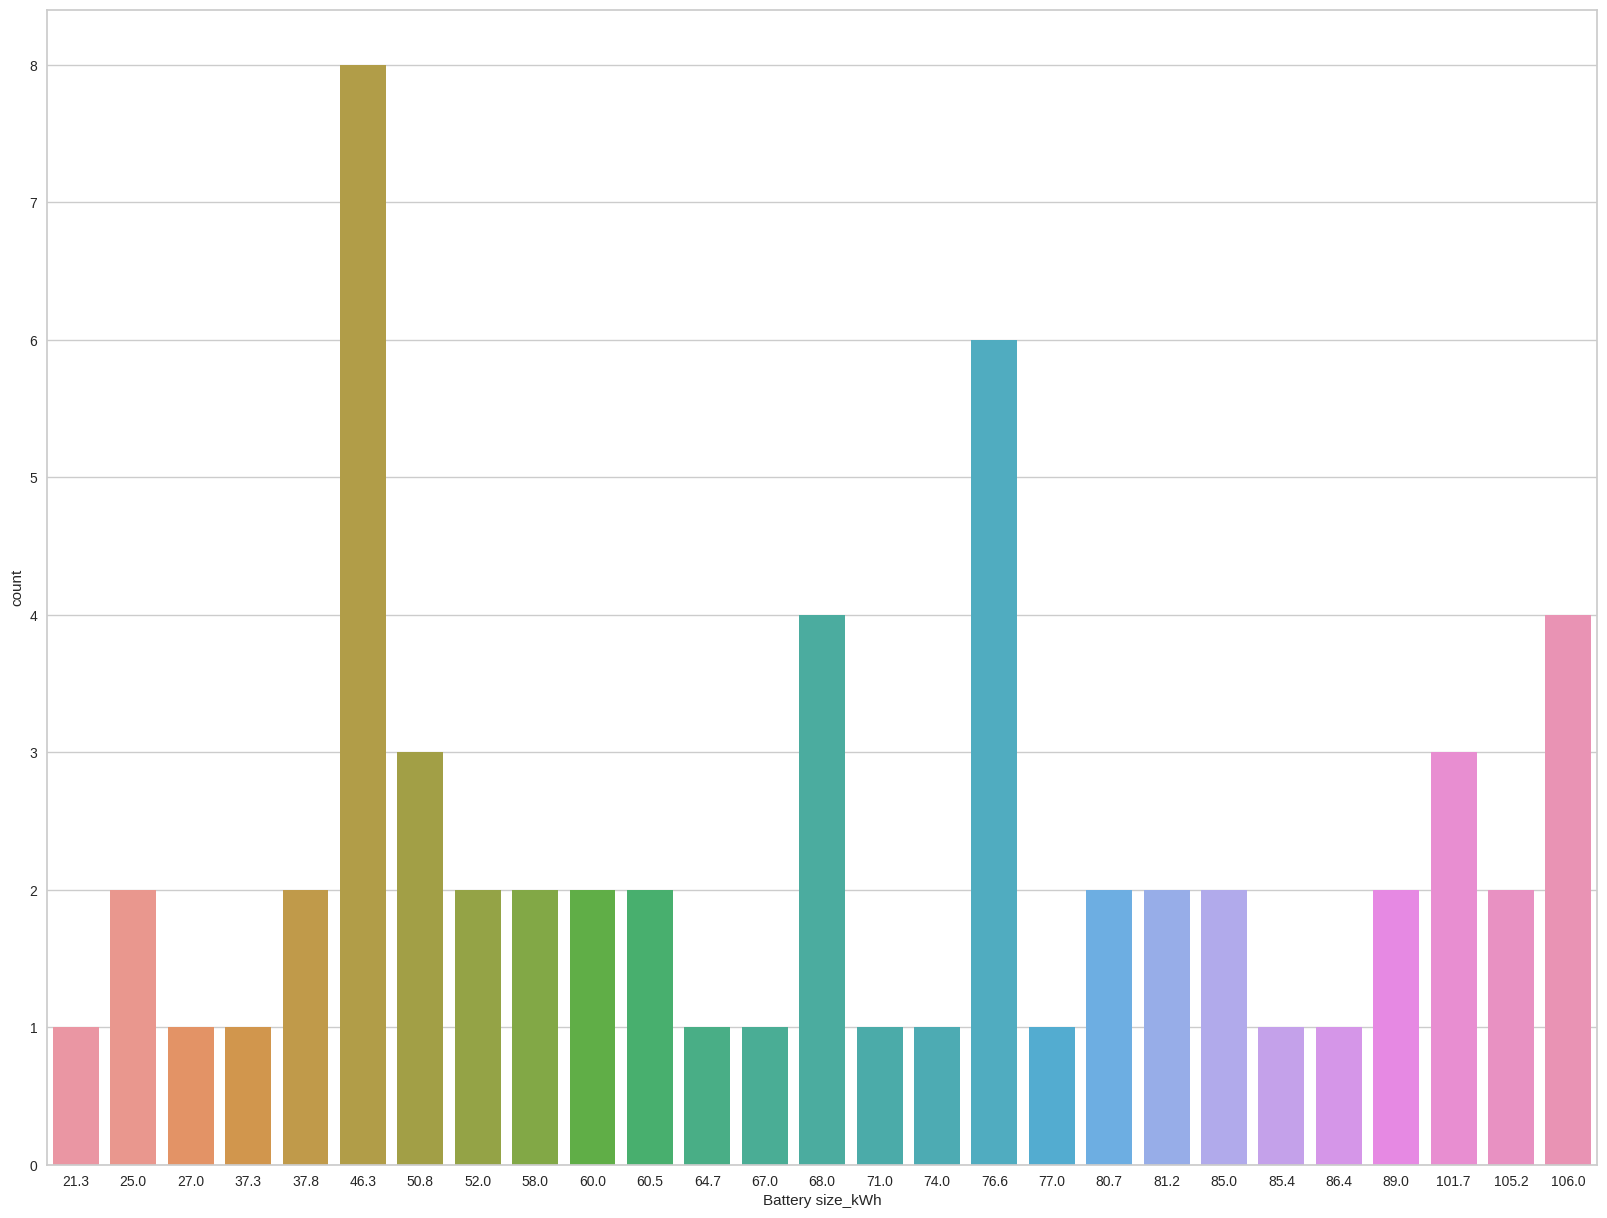

In [ ]:
# Count plot Battery size
sns.countplot(x=data['Battery size_kWh'],data=data)

<Axes: xlabel='Brand', ylabel='count'>

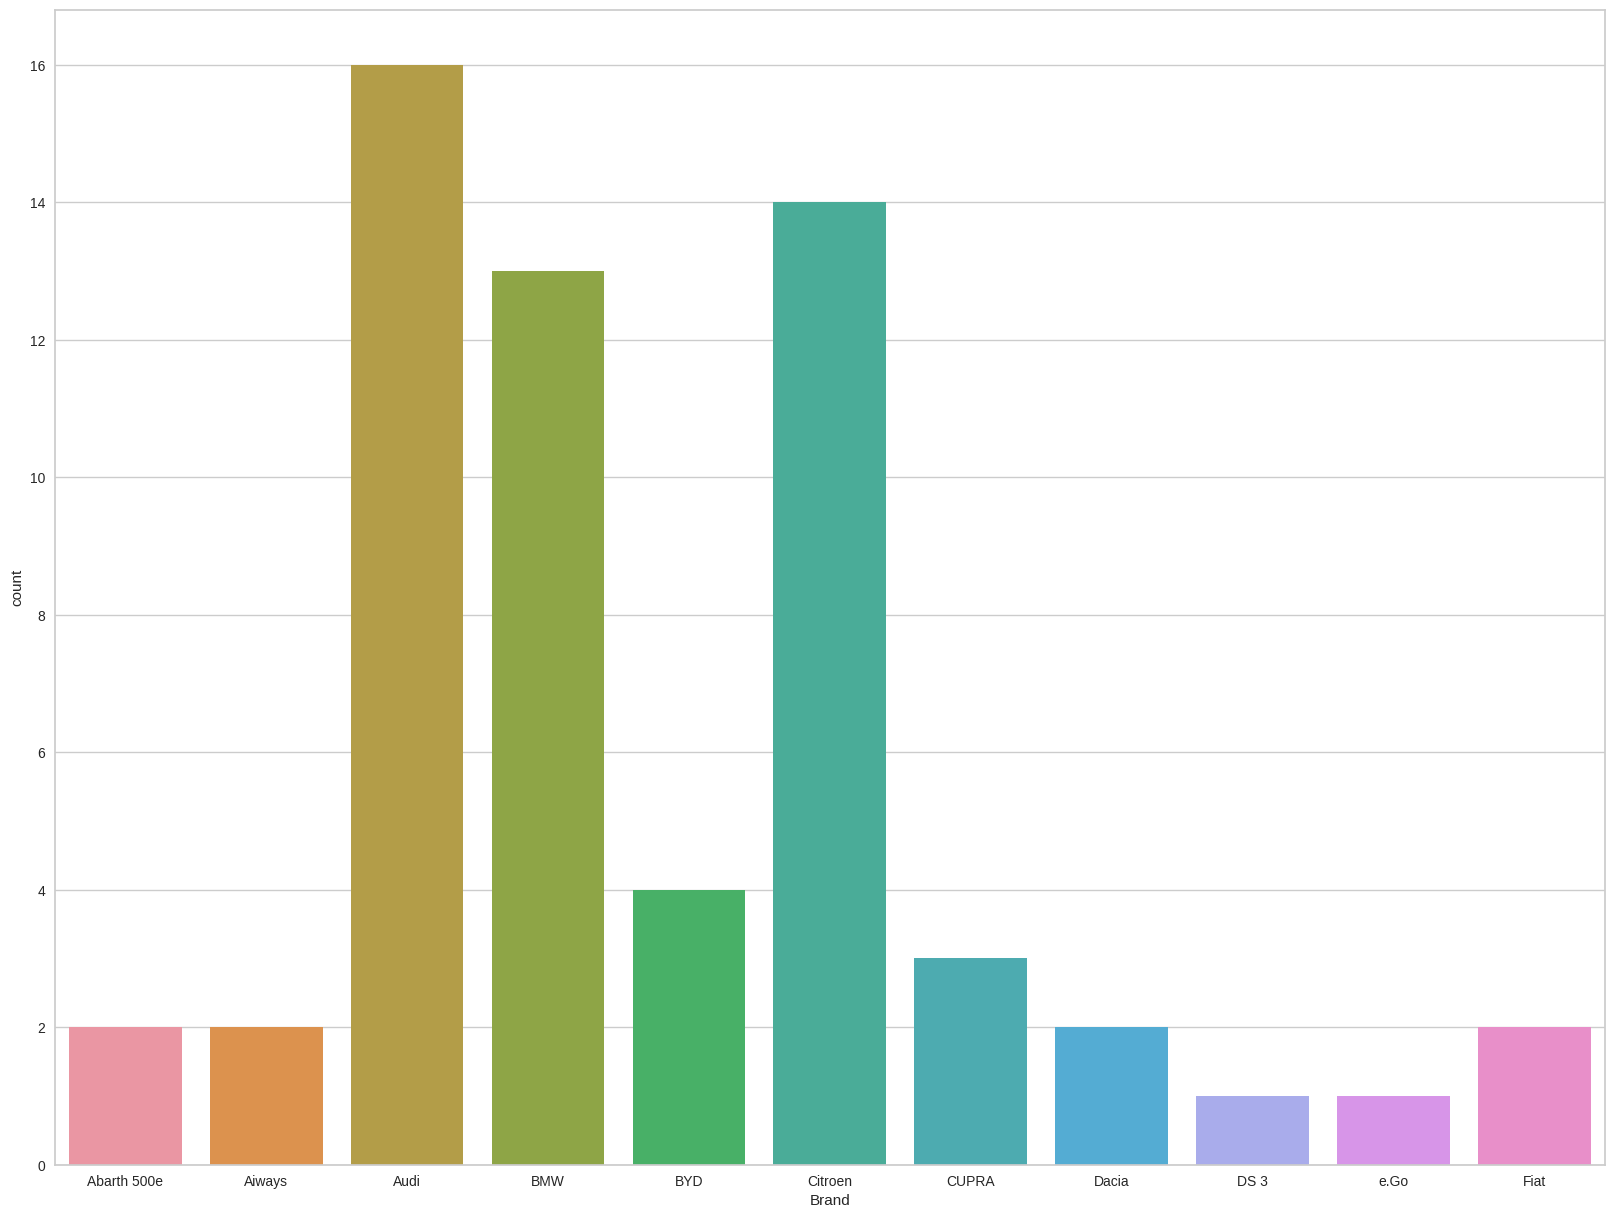

In [ ]:
# Count plot Brand
sns.countplot(x=data['Brand'],data=data)

<Axes: xlabel='Range_km', ylabel='Price (inEuro)'>

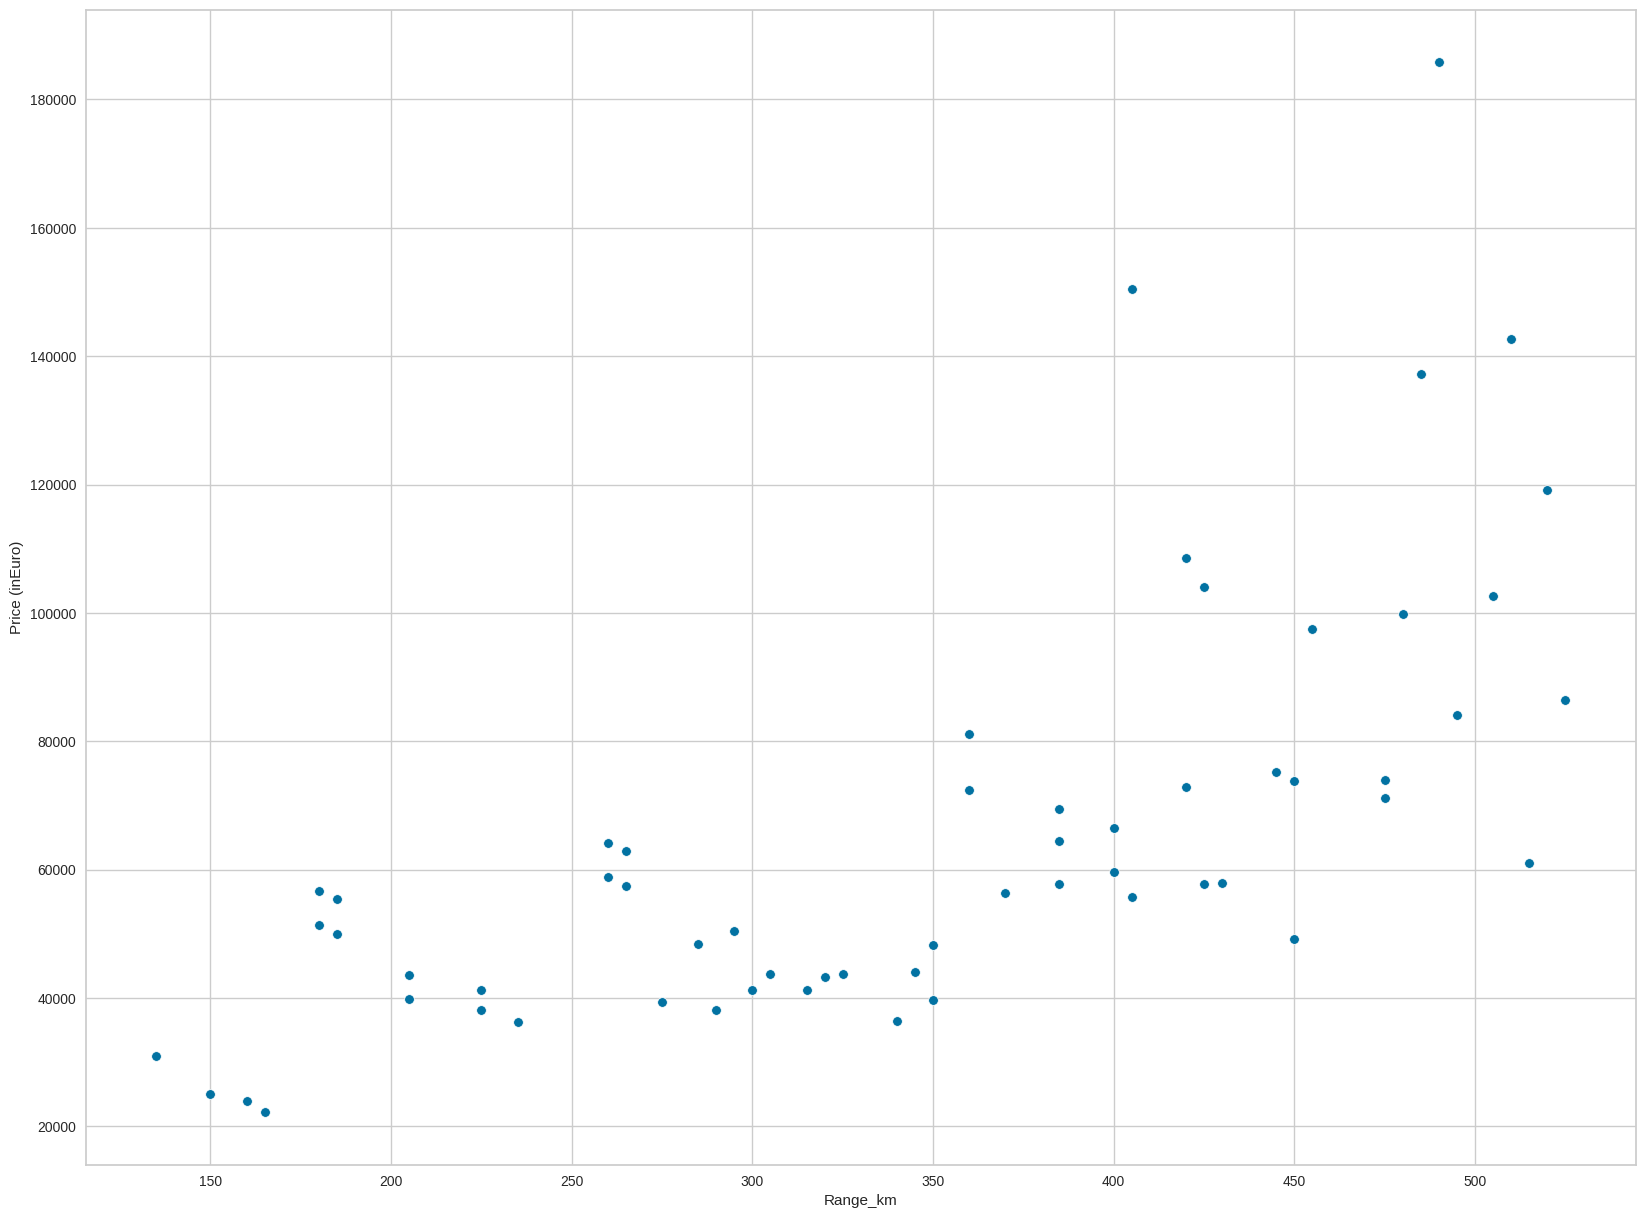

In [ ]:
# Scatter plot between Range and Price
sns.scatterplot(data=data,x='Range_km',y='Price (inEuro)')

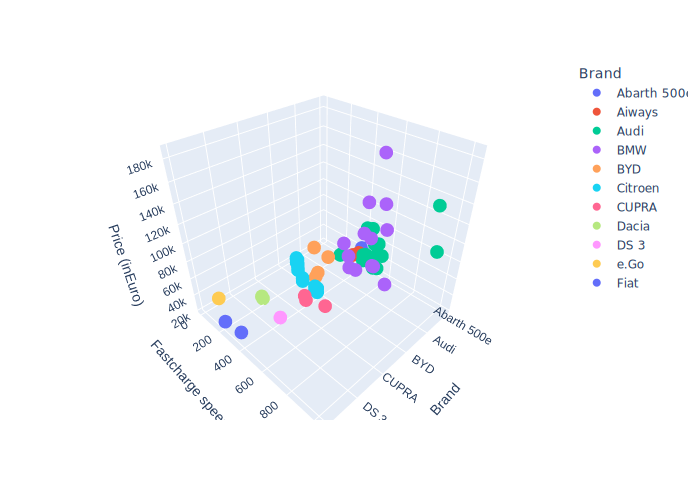

In [ ]:
# 3d Scatter plot between Brand and Speed and Price
fig = px.scatter_3d(data,x = 'Brand',y = 'Fastcharge speed_km/h',z = 'Price (inEuro)',color='Brand')
pio.show(fig)

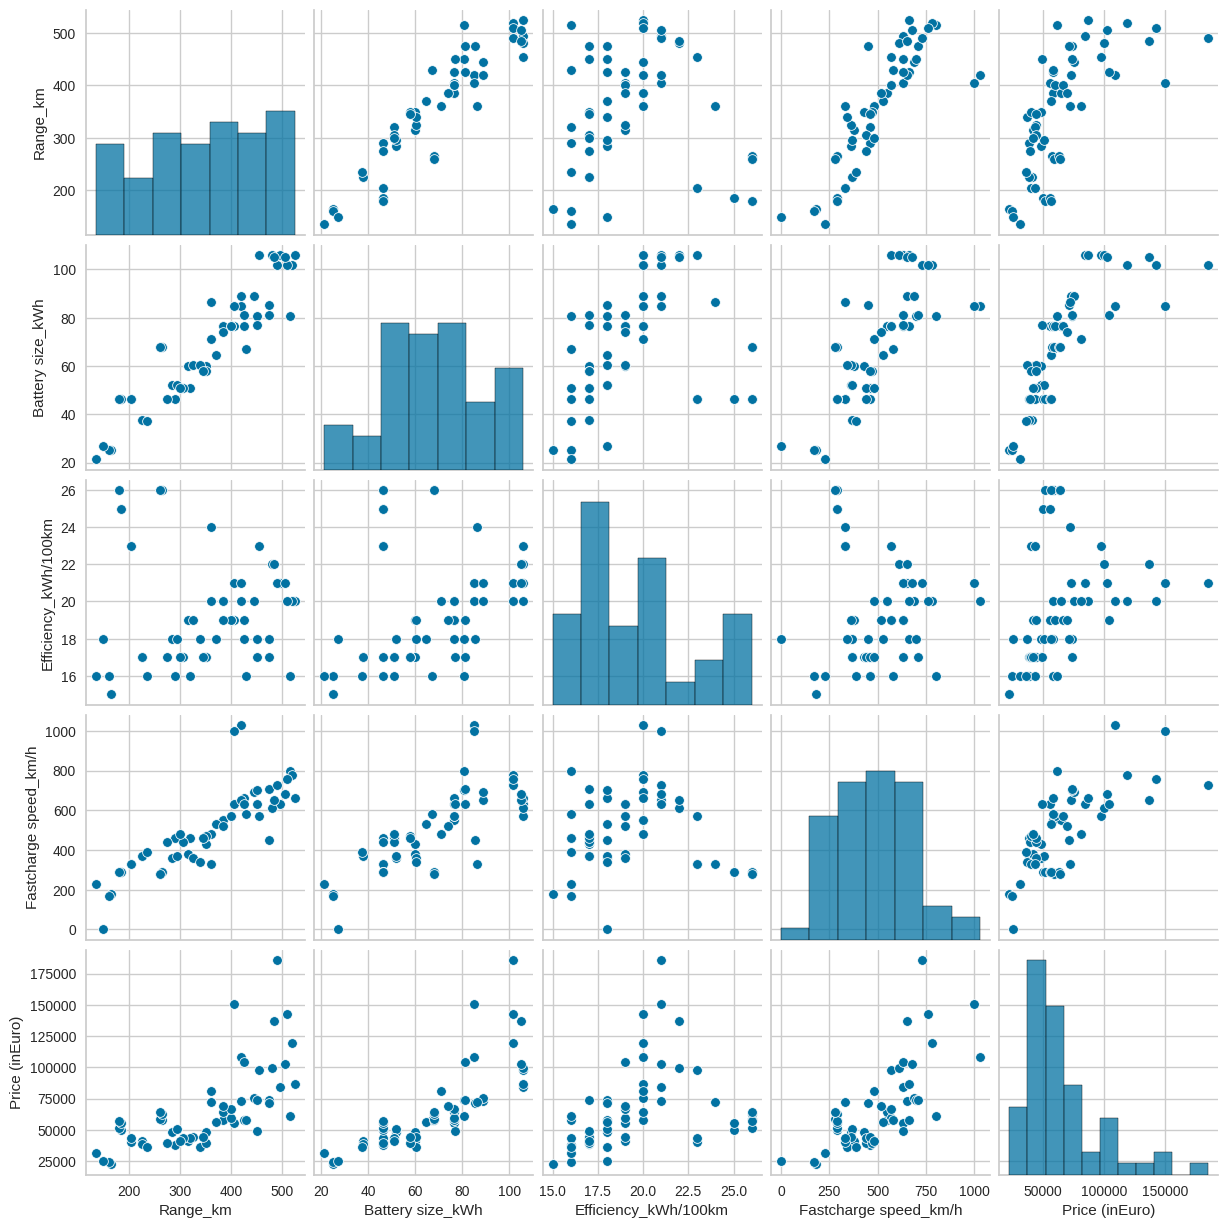

In [ ]:
# Pair plot
sns.pairplot(data)

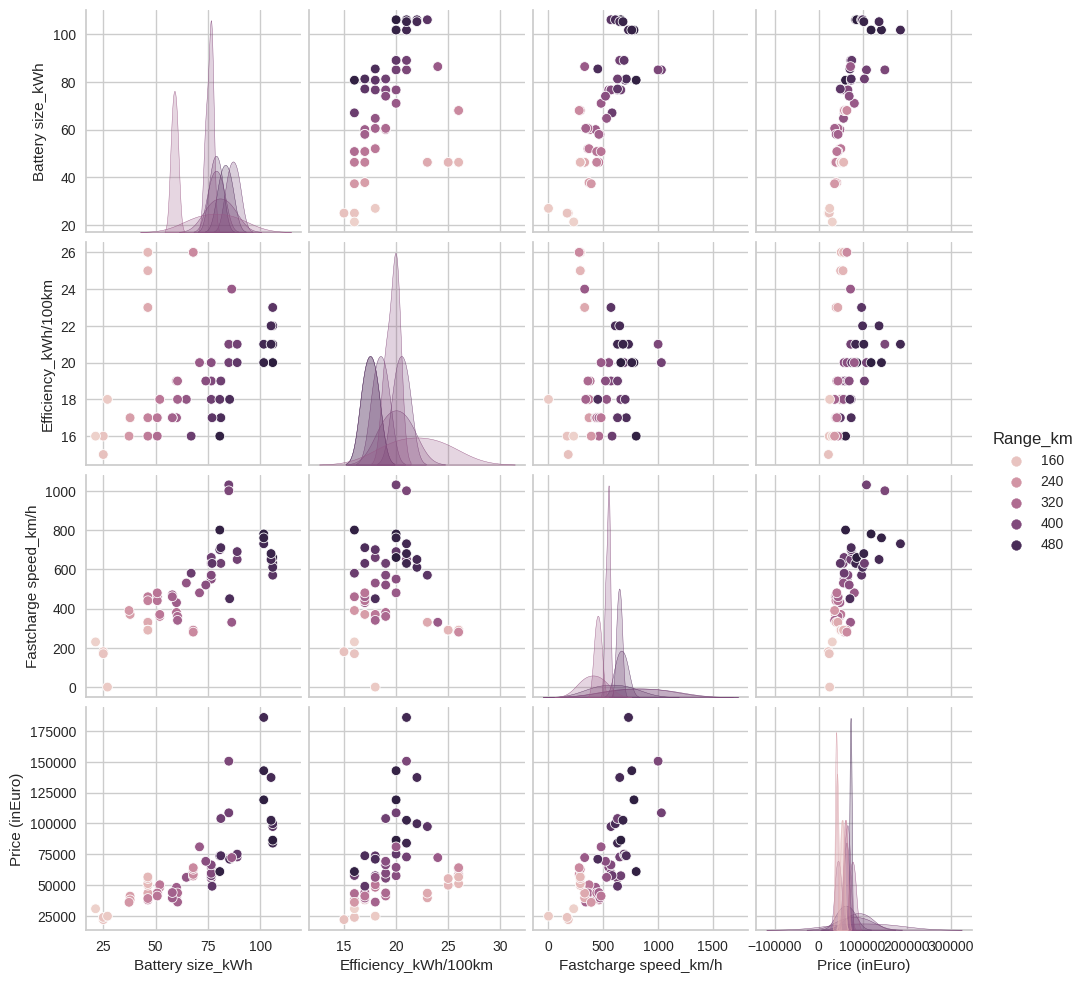

In [ ]:
# Pair plot
sns.pairplot(data,hue='Range_km')

<ipython-input-232-995d2707687d>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

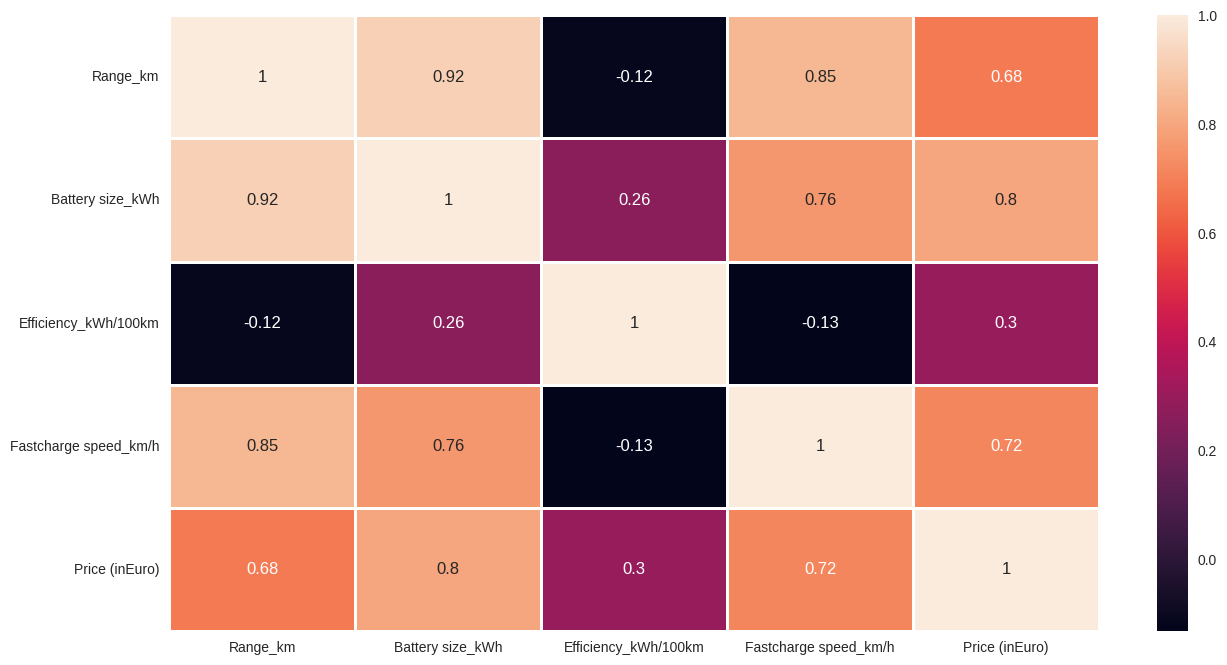

In [ ]:
# Heatmap
ax= plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),linewidths=1,linecolor='white',annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Abarth 500e'),
  Text(1, 0, 'Aiways'),
  Text(2, 0, 'Audi'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'BYD'),
  Text(5, 0, 'Citroen'),
  Text(6, 0, 'CUPRA'),
  Text(7, 0, 'Dacia'),
  Text(8, 0, 'DS 3'),
  Text(9, 0, 'e.Go'),
  Text(10, 0, 'Fiat')])

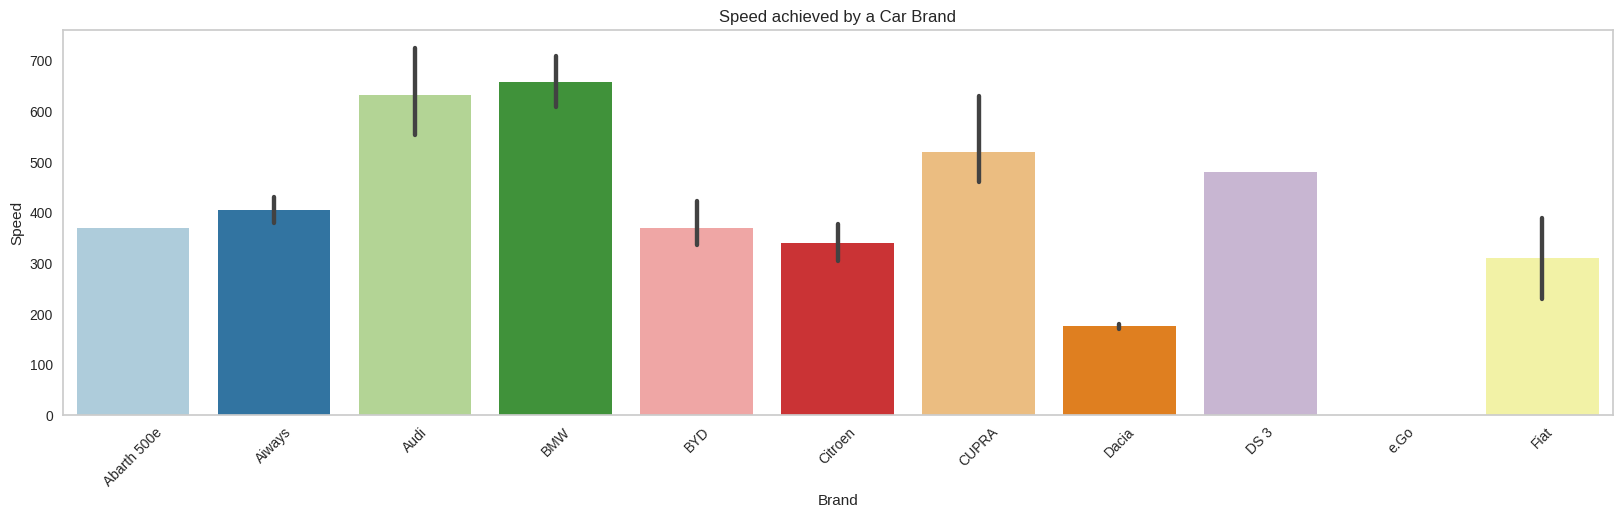

In [ ]:
# Bar plot Speed of Car
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Fastcharge speed_km/h',data=data,palette='Paired')
plt.grid(axis='y')
plt.title('Speed achieved by a Car Brand')
plt.xlabel('Brand')
plt.ylabel('Speed')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Abarth 500e'),
  Text(1, 0, 'Aiways'),
  Text(2, 0, 'Audi'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'BYD'),
  Text(5, 0, 'Citroen'),
  Text(6, 0, 'CUPRA'),
  Text(7, 0, 'Dacia'),
  Text(8, 0, 'DS 3'),
  Text(9, 0, 'e.Go'),
  Text(10, 0, 'Fiat')])

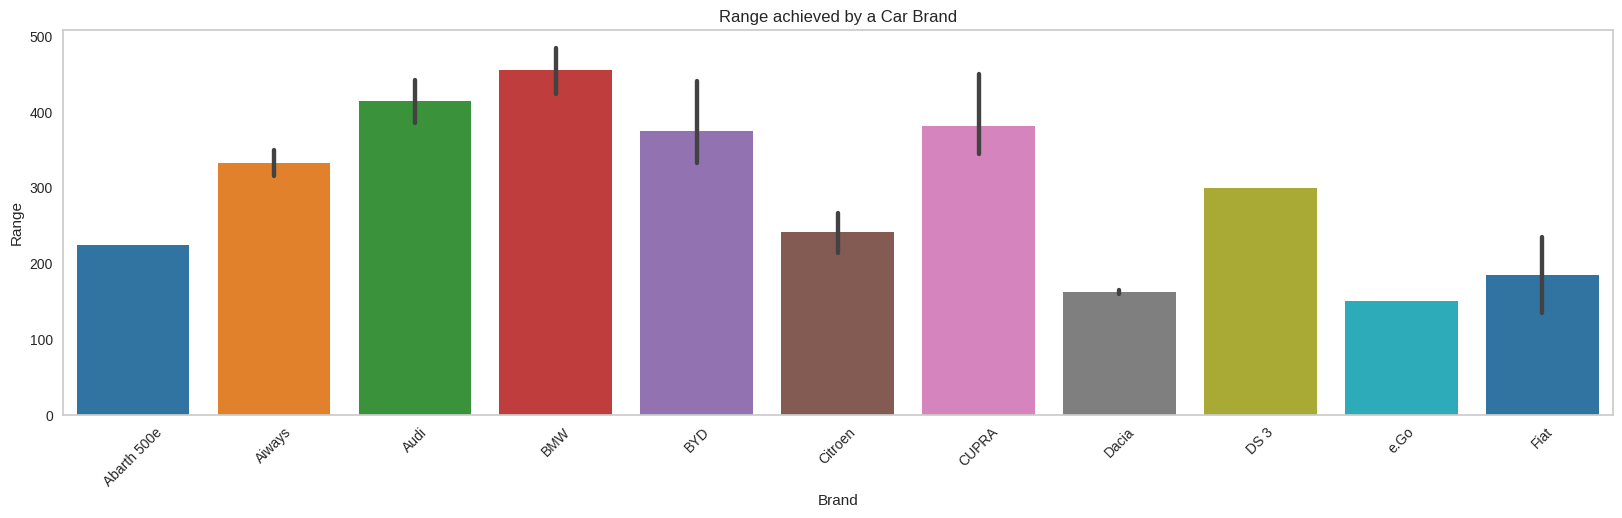

In [ ]:
# Bar plot Range of Car
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_km',data=data,palette='tab10')
plt.grid(axis='y')
plt.title('Range achieved by a Car Brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Abarth 500e'),
  Text(1, 0, 'Aiways'),
  Text(2, 0, 'Audi'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'BYD'),
  Text(5, 0, 'Citroen'),
  Text(6, 0, 'CUPRA'),
  Text(7, 0, 'Dacia'),
  Text(8, 0, 'DS 3'),
  Text(9, 0, 'e.Go'),
  Text(10, 0, 'Fiat')])

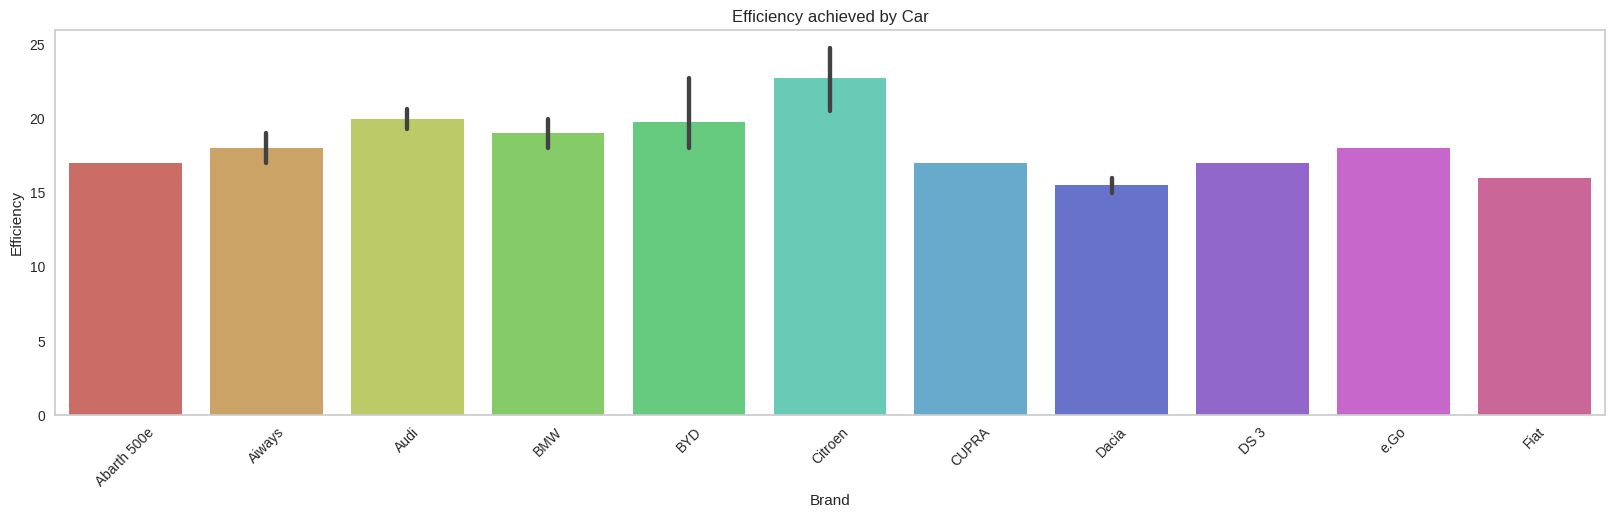

In [ ]:
# Barplot Efficiency of Car
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_kWh/100km',data=data,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by Car')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Abarth 500e'),
  Text(1, 0, 'Aiways'),
  Text(2, 0, 'Audi'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'BYD'),
  Text(5, 0, 'Citroen'),
  Text(6, 0, 'CUPRA'),
  Text(7, 0, 'Dacia'),
  Text(8, 0, 'DS 3'),
  Text(9, 0, 'e.Go'),
  Text(10, 0, 'Fiat')])

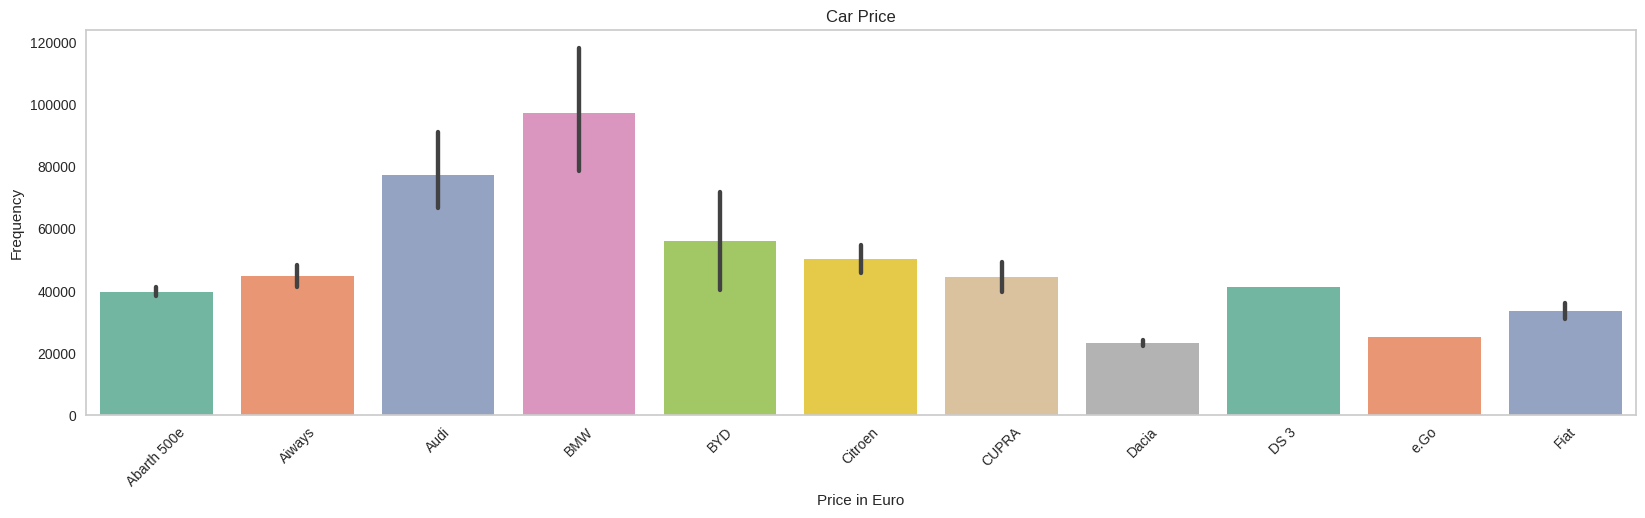

In [ ]:
# Barplot Price of Car
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Price (inEuro)',data=data,palette='Set2')
plt.title('Car Price')
plt.xlabel('Price in Euro')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Abarth 500e'),
  Text(1, 0, 'Aiways'),
  Text(2, 0, 'Audi'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'BYD'),
  Text(5, 0, 'Citroen'),
  Text(6, 0, 'CUPRA'),
  Text(7, 0, 'Dacia'),
  Text(8, 0, 'DS 3'),
  Text(9, 0, 'e.Go'),
  Text(10, 0, 'Fiat')])

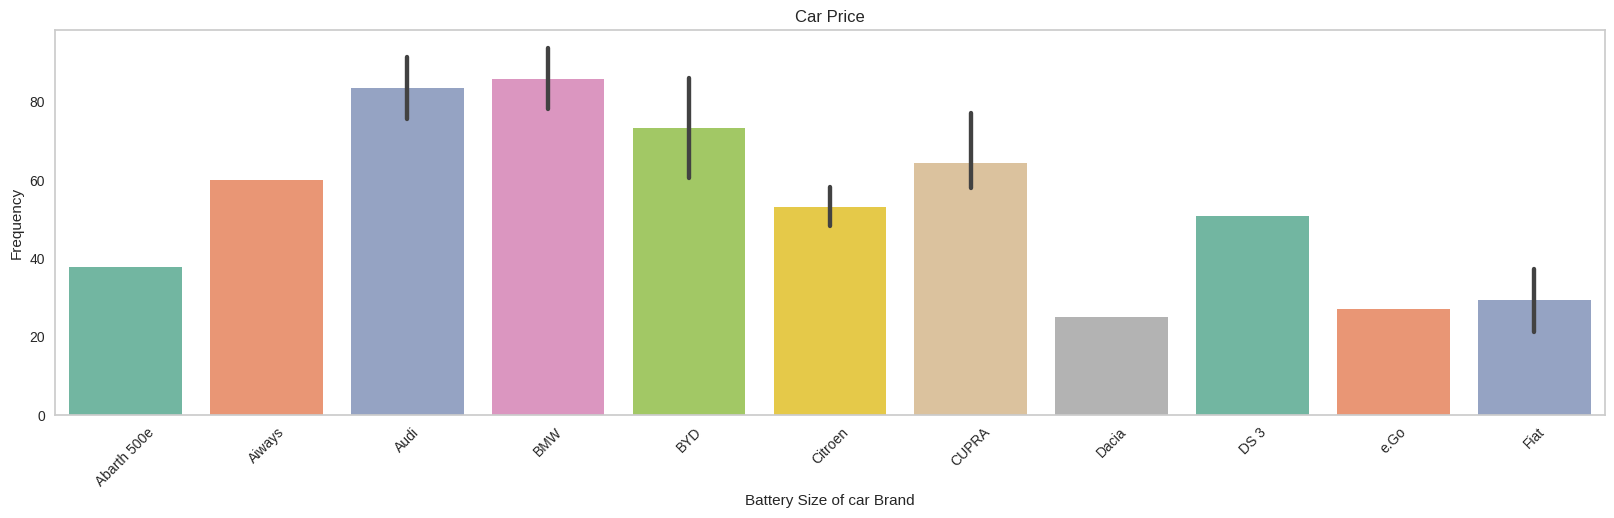

In [ ]:
# Barplot Battery Size of Car Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Battery size_kWh',data=data,palette='Set2')
plt.title('Car Price')
plt.xlabel('Battery Size of car Brand')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

In [ ]:
data3= data[["Fastcharge speed_km/h", "Price (inEuro)"]].groupby("Fastcharge speed_km/h").count()
data4= data[["Range_km", "Price (inEuro)"]].groupby("Range_km").count()
data5= data[["Range_km", "Fastcharge speed_km/h"]].groupby("Range_km").count()
data5.head()

Fastcharge speed_km/h
Range_km                       
135                           1
150                           1
160                           1
165                           1
180                           2

In [ ]:
data3=data3.sort_values("Fastcharge speed_km/h",ascending = False).head(10)
data4=data4.sort_values("Range_km",ascending = False).head(10)
data5=data5.sort_values("Range_km",ascending = False).head(10)

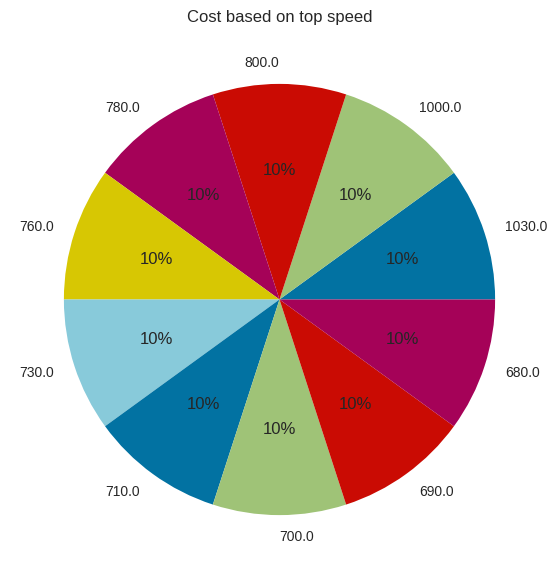

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=data3["Price (inEuro)"],labels=data3.index,autopct='%1.0f%%')
plt.show()

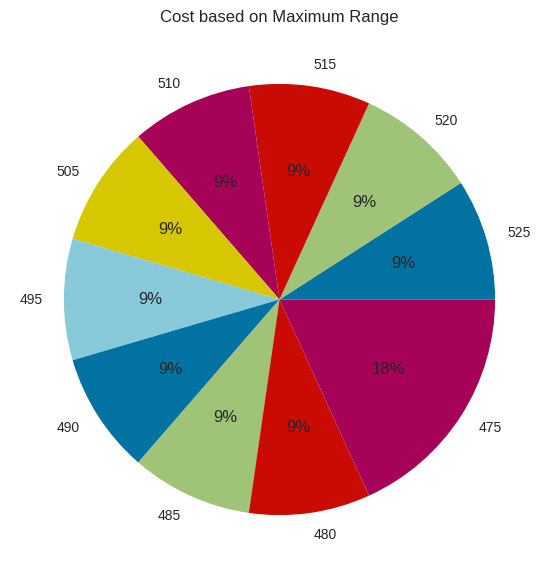

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Cost based on Maximum Range')
plt.pie(x=data4["Price (inEuro)"],labels=data4.index,autopct='%1.0f%%')
plt.show()

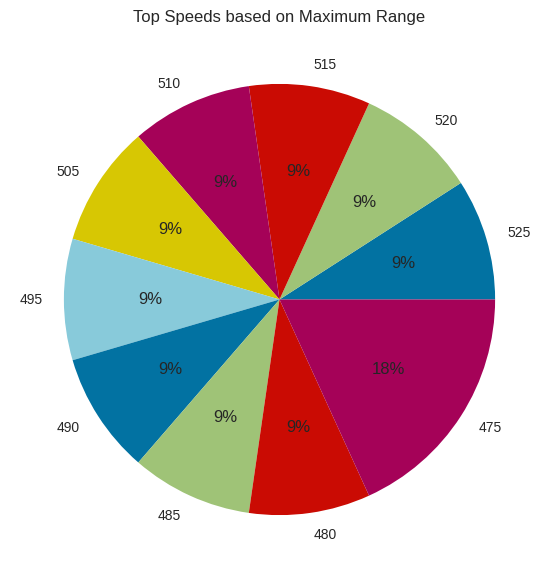

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Top Speeds based on Maximum Range')
plt.pie(x=data5["Fastcharge speed_km/h"],labels=data5.index,autopct='%1.0f%%')
plt.show()

In [ ]:
# Numeric Column
# Linear Regression using OLS Method
x=data[['Range_km','Battery size_kWh','Efficiency_kWh/100km','Fastcharge speed_km/h',]] #Independent Variable
y=data['Price (inEuro)'] #Dependent Variable

In [ ]:
x= sm.add_constant(x)
results = sm.OLS(y,x)

In [ ]:
# Fit and Summary of Model
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Price (inEuro)   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     40.72
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           7.83e-16
Time:                        07:25:10   Log-Likelihood:                -666.52
No. Observations:                  60   AIC:                             1343.
Df Residuals:                      55   BIC:                             1354.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.037e+04   4.01e+04      1.007      0.318   -3.99e+04    1.21e+05
Range_km               -387.8664    139.809     -2.774      0.008    -668.051    -107.682
Battery size_kWh       2320.8361    666.153      3.484      0.001     985.836    3655.836
Efficiency_kWh/100km  -2210.4007   1949.772     -1.134      0.262   -6117.830    1697.029
Fastcharge speed_km/h    93.3702     20.960      4.455      0.000      51.365     135.376
==============================================================================
Omnibus:                       43.438   Durbin-Watson:                   1.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.104
Skew:                           2.010   Prob(JB):                     1.15e-37
Kurtosis:                      10.203   Cond. No.                     1.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [ ]:
# R2 Score
r2=(r2_score(y_test,pred))
print(r2*100)

80.23665706662322


In [ ]:
y1=data[['Fastcharge speed_km/h']]
x1=data[['Price (inEuro)']]

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [ ]:
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([290., 290., 290., 290., 290., 290., 290., 290., 290., 290., 290.,
       290.])

In [ ]:
# Confusion Matrix of Regression
cmatrix = confusion_matrix(y1_test, pred1)
cmatrix

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

<Axes: xlabel='Range_km', ylabel='Efficiency_kWh/100km'>

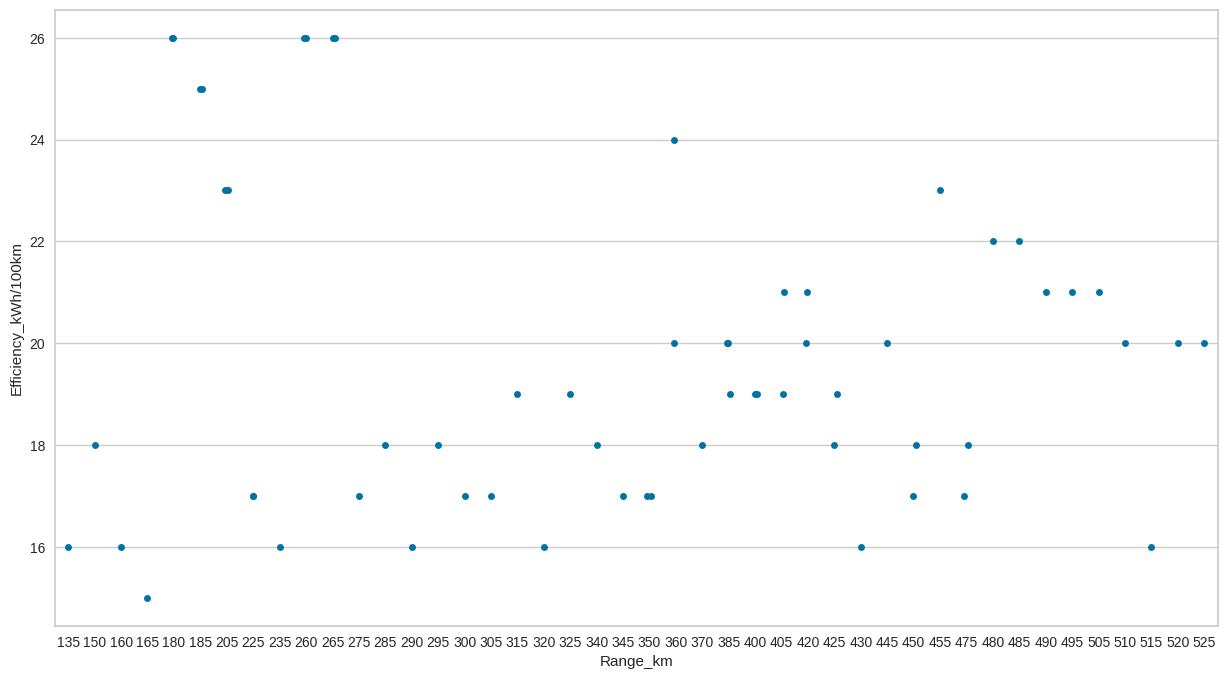

In [ ]:
# Clustering
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='Range_km', y='Efficiency_kWh/100km', data=data, jitter=True)

In [ ]:
# Standardizing by Standard Scalar
features = ['Range_km','Battery size_kWh','Efficiency_kWh/100km','Fastcharge speed_km/h','Price (inEuro)']
# Separating out the features
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [ ]:
# Principal Component Analysis
pca = PCA(n_components=5)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','PC5'])
data2

PC1     PC2     PC3     PC4     PC5
0  -1.9553 -0.7277  0.5170 -0.0095 -0.0524
1  -1.9998 -0.7492  0.4532  0.0370 -0.0591
2  -0.9681 -0.2130 -0.3667 -0.0409 -0.0273
3  -0.6197 -0.8774 -0.1967 -0.2089  0.0362
4   2.7194 -0.3332  1.1231  1.2566 -0.1573
5   3.2166  0.3242  1.9825  0.6159 -0.0717
6  -1.2532 -0.4126  0.0792 -0.2371 -0.0202
7   0.6594 -0.5129 -0.3658  0.4798 -0.0381
8   0.4186 -0.0666 -0.4113  0.2657 -0.0527
9   0.5195 -0.0180 -0.2668  0.1604 -0.0376
10 -1.1526 -0.4312  0.0964 -0.2419  0.0418
11  0.8352 -0.8673 -0.3150  0.4354  0.0038
12  0.5466 -0.3982 -0.3558  0.1886 -0.0377
13  0.6475 -0.3495 -0.2113  0.0832 -0.0227
14  1.3568  0.2064 -0.3645  0.3923 -0.1424
15  2.2059  0.2585 -0.8082 -0.0817 -0.1643
16  1.5849 -0.1686 -0.3120  0.3760 -0.0729
17  2.4337 -0.1132 -0.7901 -0.1454 -0.0602
18  2.1124  1.0916 -0.5400 -0.2625 -0.2097
19  2.3405  0.7166 -0.4875 -0.2788 -0.1401
20  0.4028 -1.4104 -0.1808 -0.0290  0.2067
21  1.7004 -1.7591 -0.3870  0.5750  0.2392
22  1.3821 -0.8297 -0.0943  0.2806  0.0539
23  1.5145 -1.1795 -0.1464  0.1769  0.1145
24  1.5731 -0.1814  0.4860 -0.3281  0.0523
25  3.0947 -0.0469  0.2007 -0.1410  0.0667
26  3.8427  0.8443  1.6192 -1.2264  0.1229
27  3.3493  0.1674  0.7116 -0.5721  0.0651
28  2.9998  0.9187  0.3665 -0.7017 -0.0174
29  0.3493  0.2076  0.1897 -0.2984  0.0411
30  2.6325  0.3026 -0.3605 -0.1791 -0.0565
31 -0.0314 -0.6694 -0.0847  0.1033  0.0716
32  0.4380 -0.2501 -0.1154 -0.1196 -0.0111
33 -0.9233 -0.1871 -0.3967 -0.1750  0.0319
34 -1.0342 -0.5352 -0.6048 -0.2637  0.0409
35  0.9429 -0.5555 -0.7475 -0.7270  0.1517
36  0.2799  1.5853 -0.7146 -0.4447 -0.0921
37 -1.8515  1.1436  0.0780  0.4500  0.0238
38 -1.7951  1.1708  0.1588  0.3912  0.0322
39 -1.3052 -1.2365  0.1992  0.1401 -0.0251
40 -0.9874 -1.2339  0.0958 -0.0125  0.0343
41 -1.3858 -0.8820  0.2117  0.1677 -0.0330
42 -1.0798 -0.8852  0.0914  0.0275  0.0246
43 -1.8508  1.8881  0.2276  0.3713  0.0866
44 -0.8564  2.1955 -0.4205  0.0975  0.0116
45 -1.8342  2.1976  0.2329  0.4628  0.1328
46 -0.8850  2.2276 -0.3882  0.0446 -0.0125
47 -1.7707  1.9267  0.3424  0.2876  0.0985
48 -0.7763  2.2342 -0.3058  0.0138  0.0236
49 -1.7540  2.2363  0.3477  0.3791  0.1448
50 -0.8048  2.2662 -0.2734 -0.0390 -0.0005
51 -0.6935 -1.0012 -0.2756  0.0960  0.0629
52 -0.6760 -0.9470 -0.1774 -0.0049  0.0456
53  0.7383 -1.2285 -0.6116  0.3084  0.0632
54 -3.3180 -1.1558  0.4000 -0.5004 -0.1529
55 -3.3188 -0.8299  0.4000 -0.4559 -0.1019
56 -1.0391 -0.9430  0.1248  0.2284 -0.0262
57 -3.6861  0.0048  0.0655 -0.9307 -0.0104
58 -3.2652 -0.8268  0.8216 -0.2689 -0.1500
59 -1.9656 -1.1021  0.4543  0.0320 -0.0685

In [ ]:
df_8=data2.iloc[:,:8]
df_8.head(3)

PC1     PC2     PC3     PC4     PC5
0 -1.9553 -0.7277  0.5170 -0.0095 -0.0524
1 -1.9998 -0.7492  0.4532  0.0370 -0.0591
2 -0.9681 -0.2130 -0.3667 -0.0409 -0.0273

In [ ]:
# Correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_8.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

PC1     PC2     PC3     PC4     PC5
variable                                       
PC1      0.5094 -0.2239 -0.4568 -0.1450  0.6788
PC2      0.5201  0.1319 -0.4569 -0.1660 -0.6897
PC3      0.0635  0.9042 -0.1338  0.3276  0.2306
PC4      0.4882 -0.2490  0.3133  0.7721 -0.0728
PC5      0.4770  0.2299  0.6831 -0.4980  0.0711

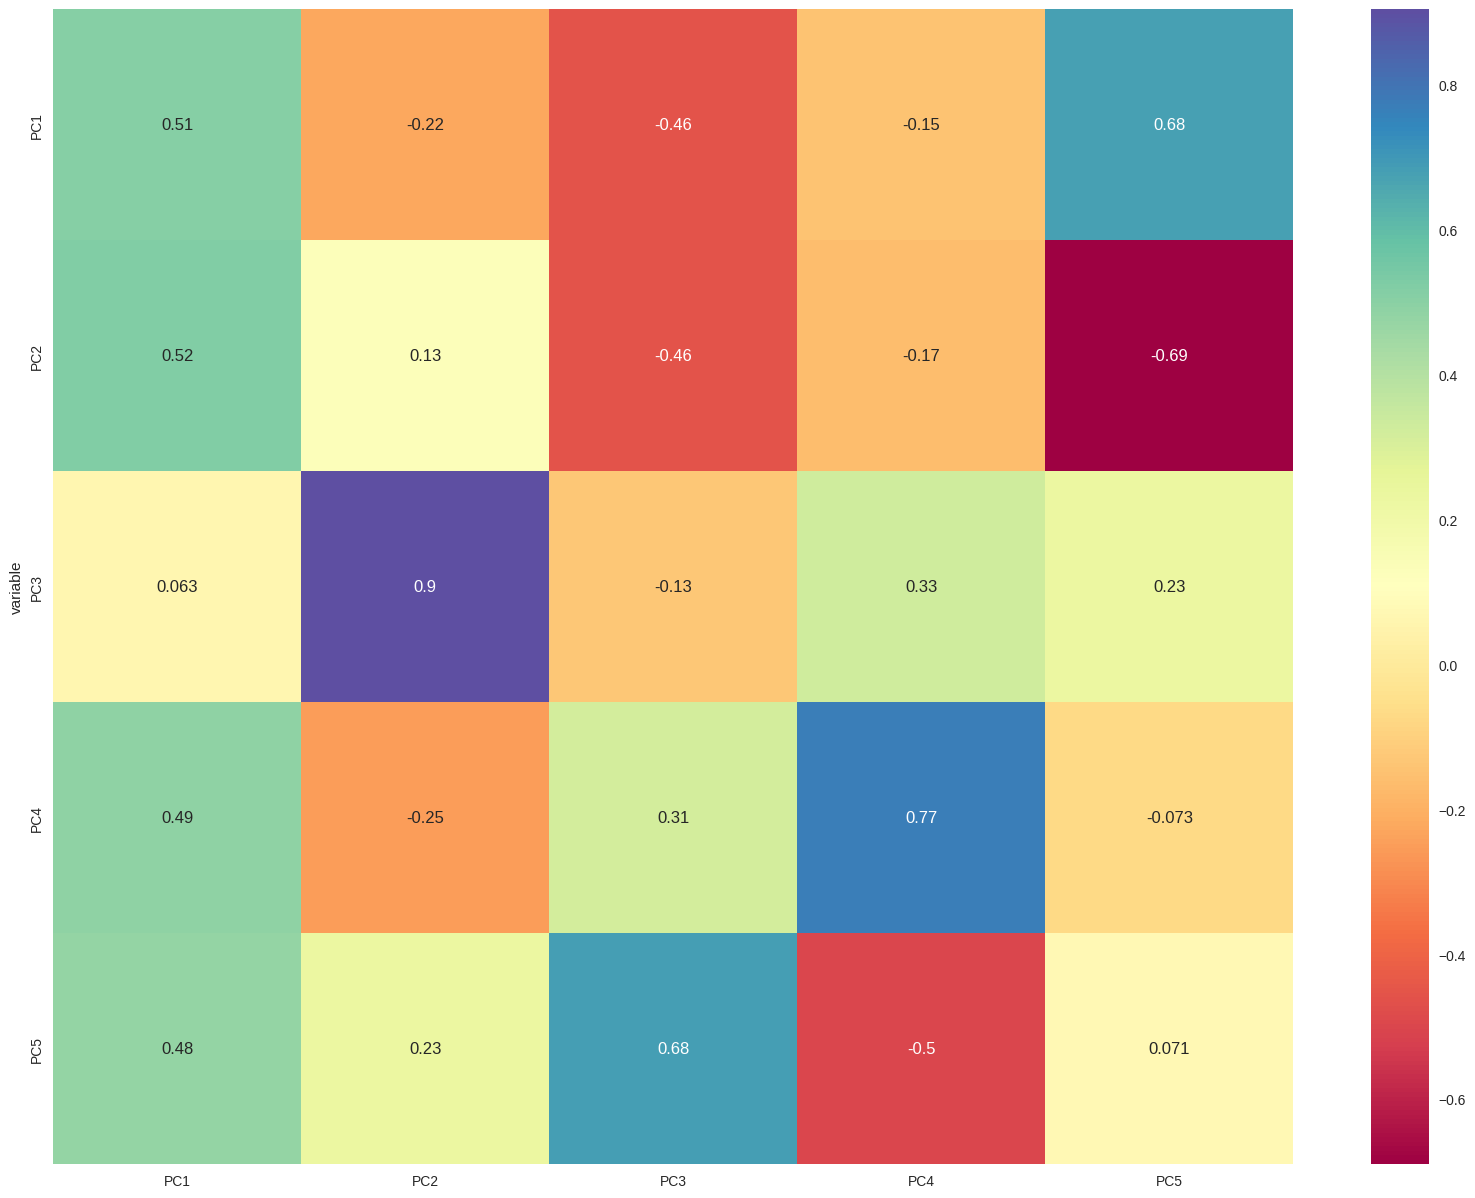

In [ ]:
# Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

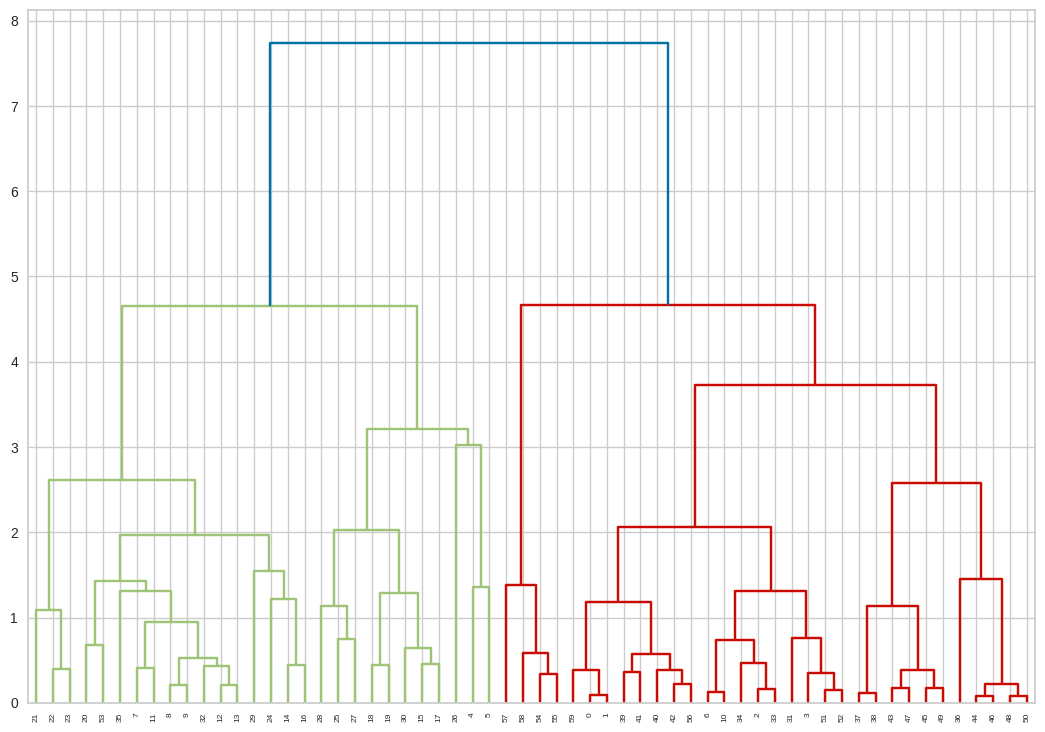

In [ ]:
# Dendogram Plot
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

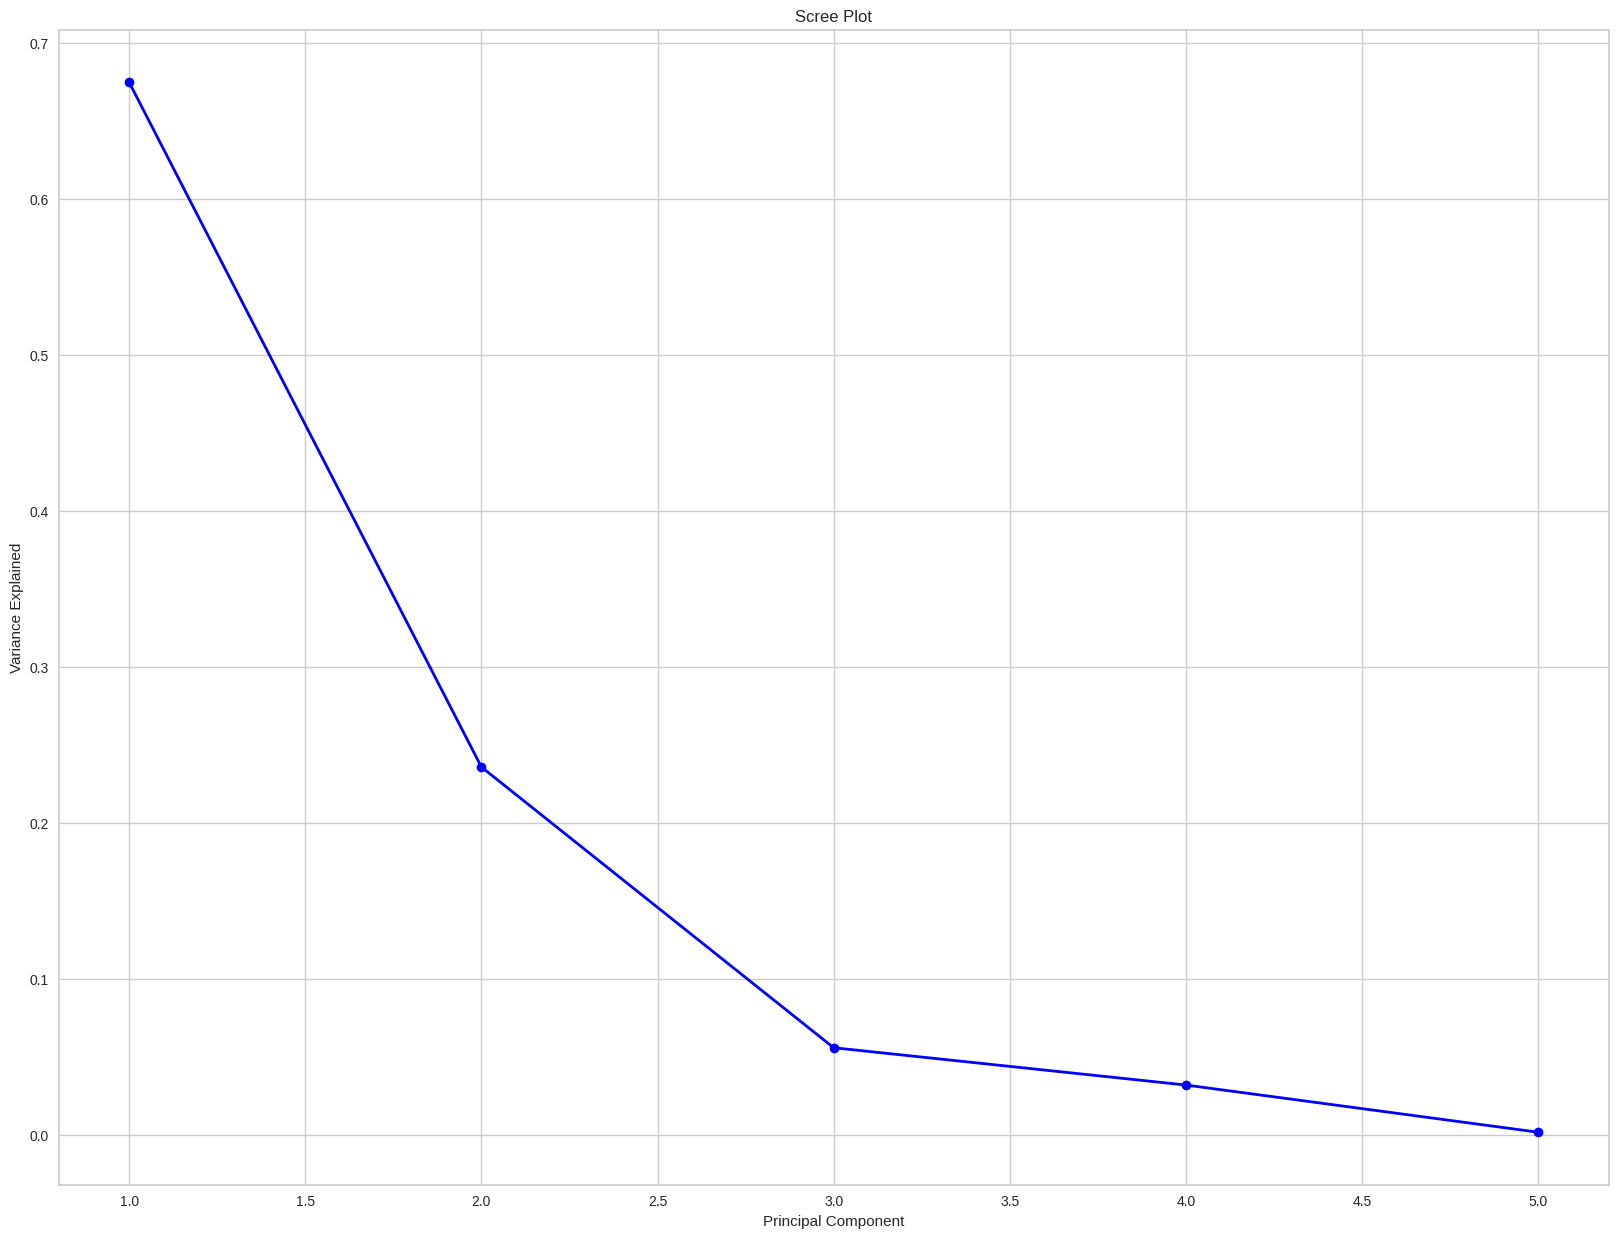

In [ ]:
# Scree Plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

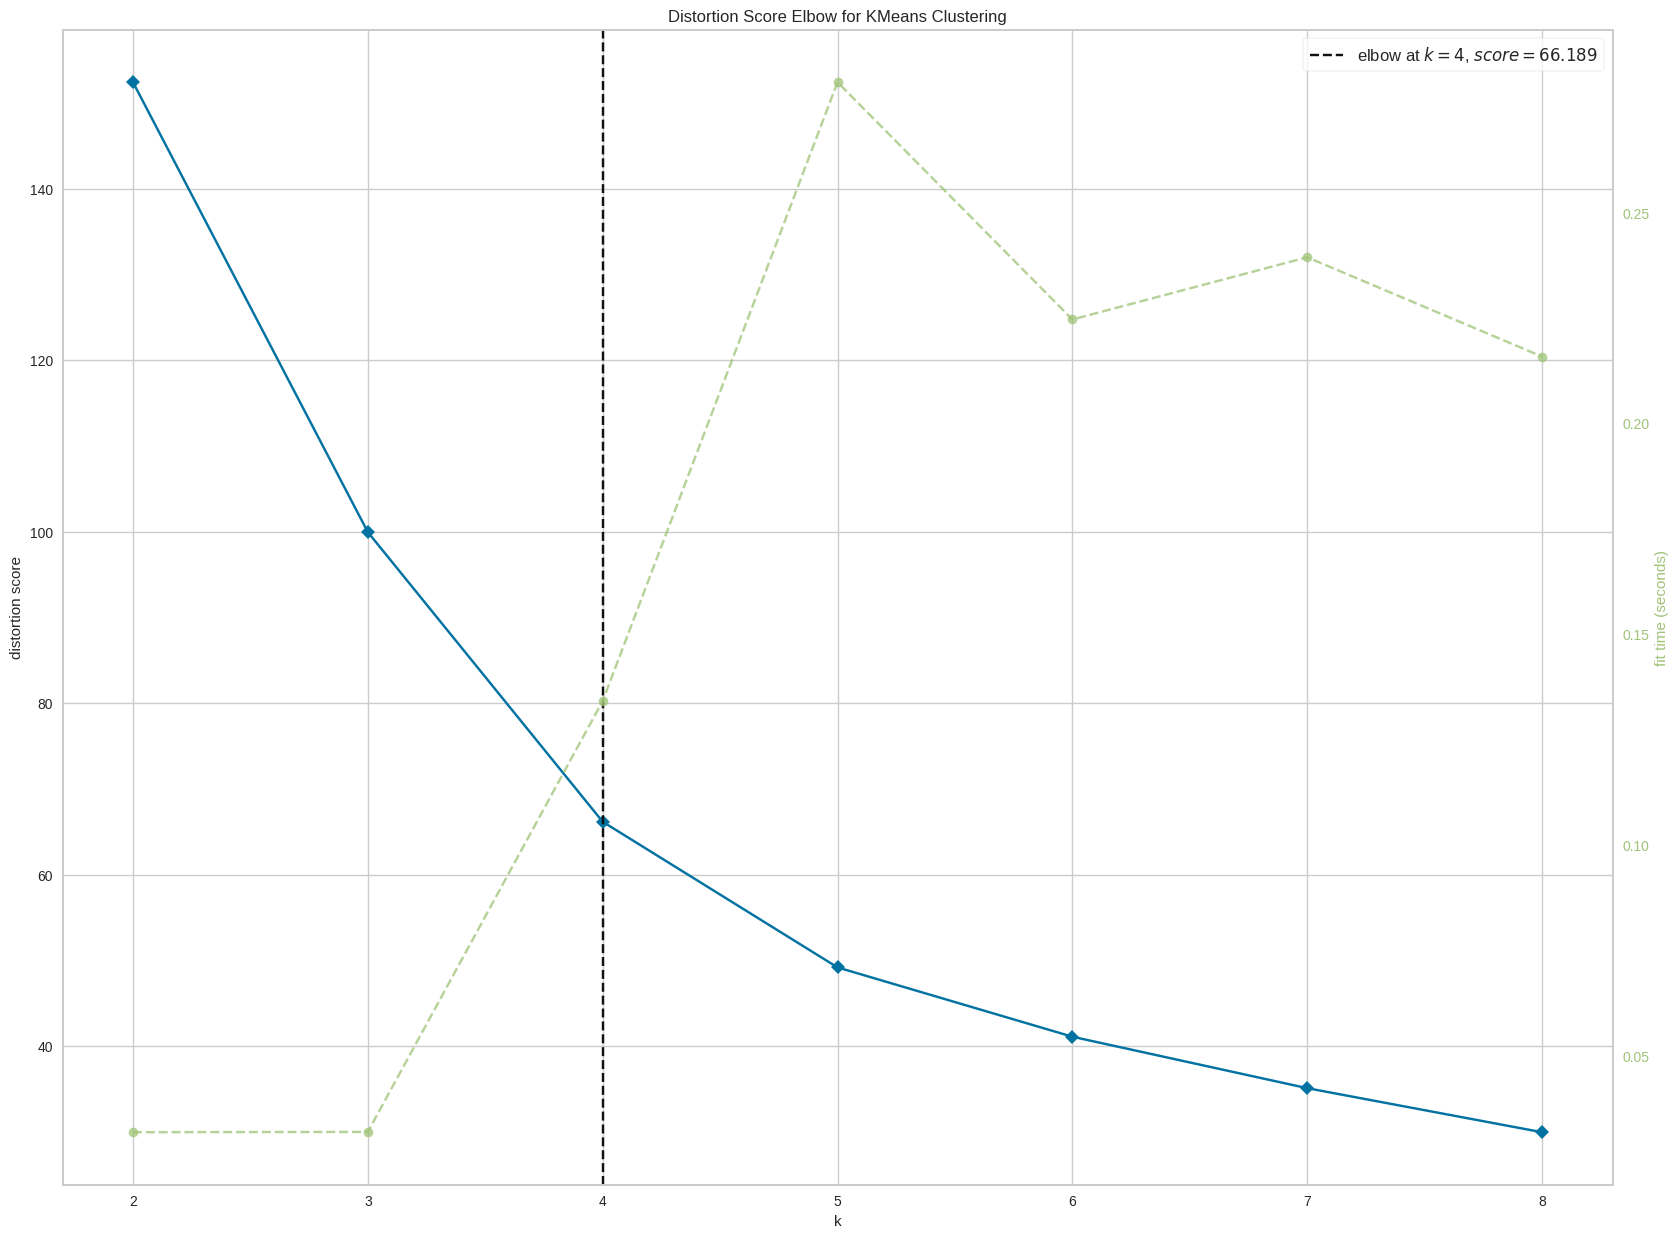

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Distortion Score Elbow for KMeans Clustering
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

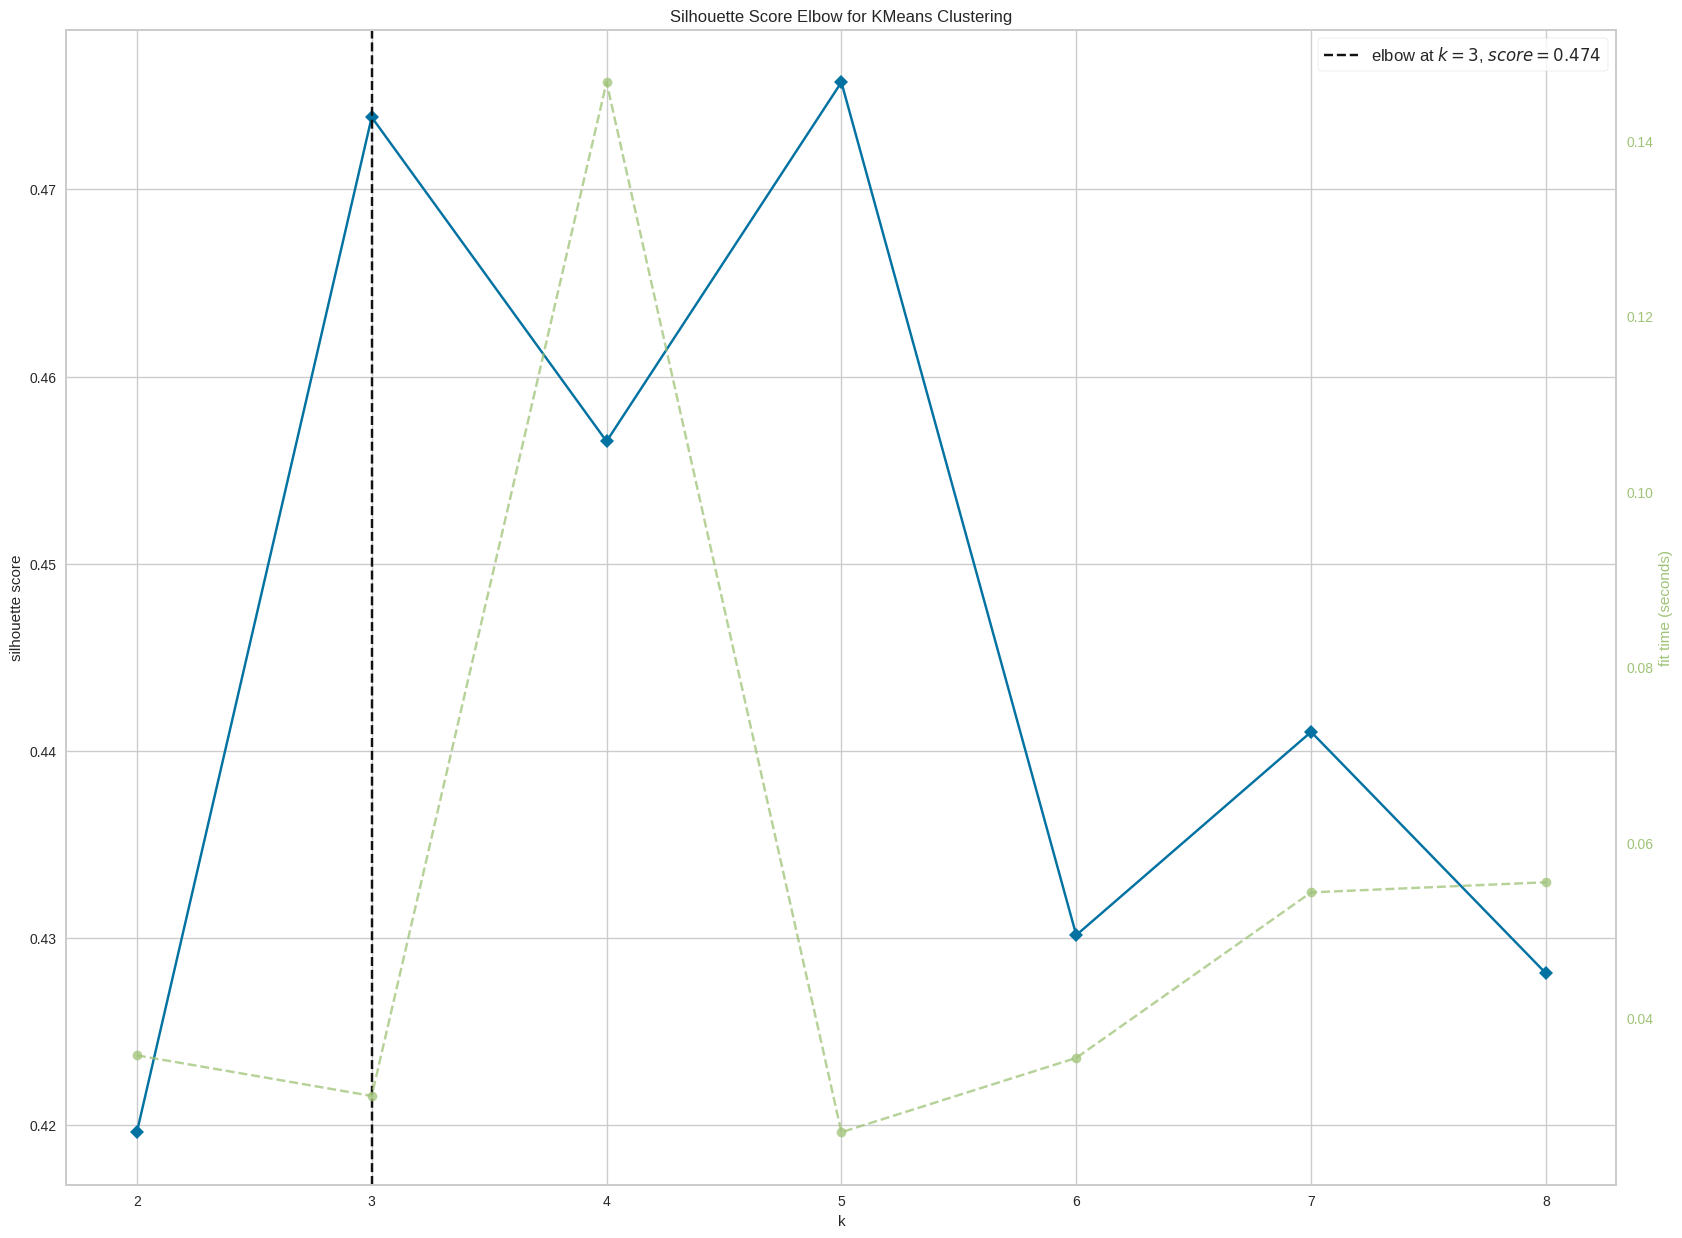

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Silhouette Score Elbow for K Means Clustering
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

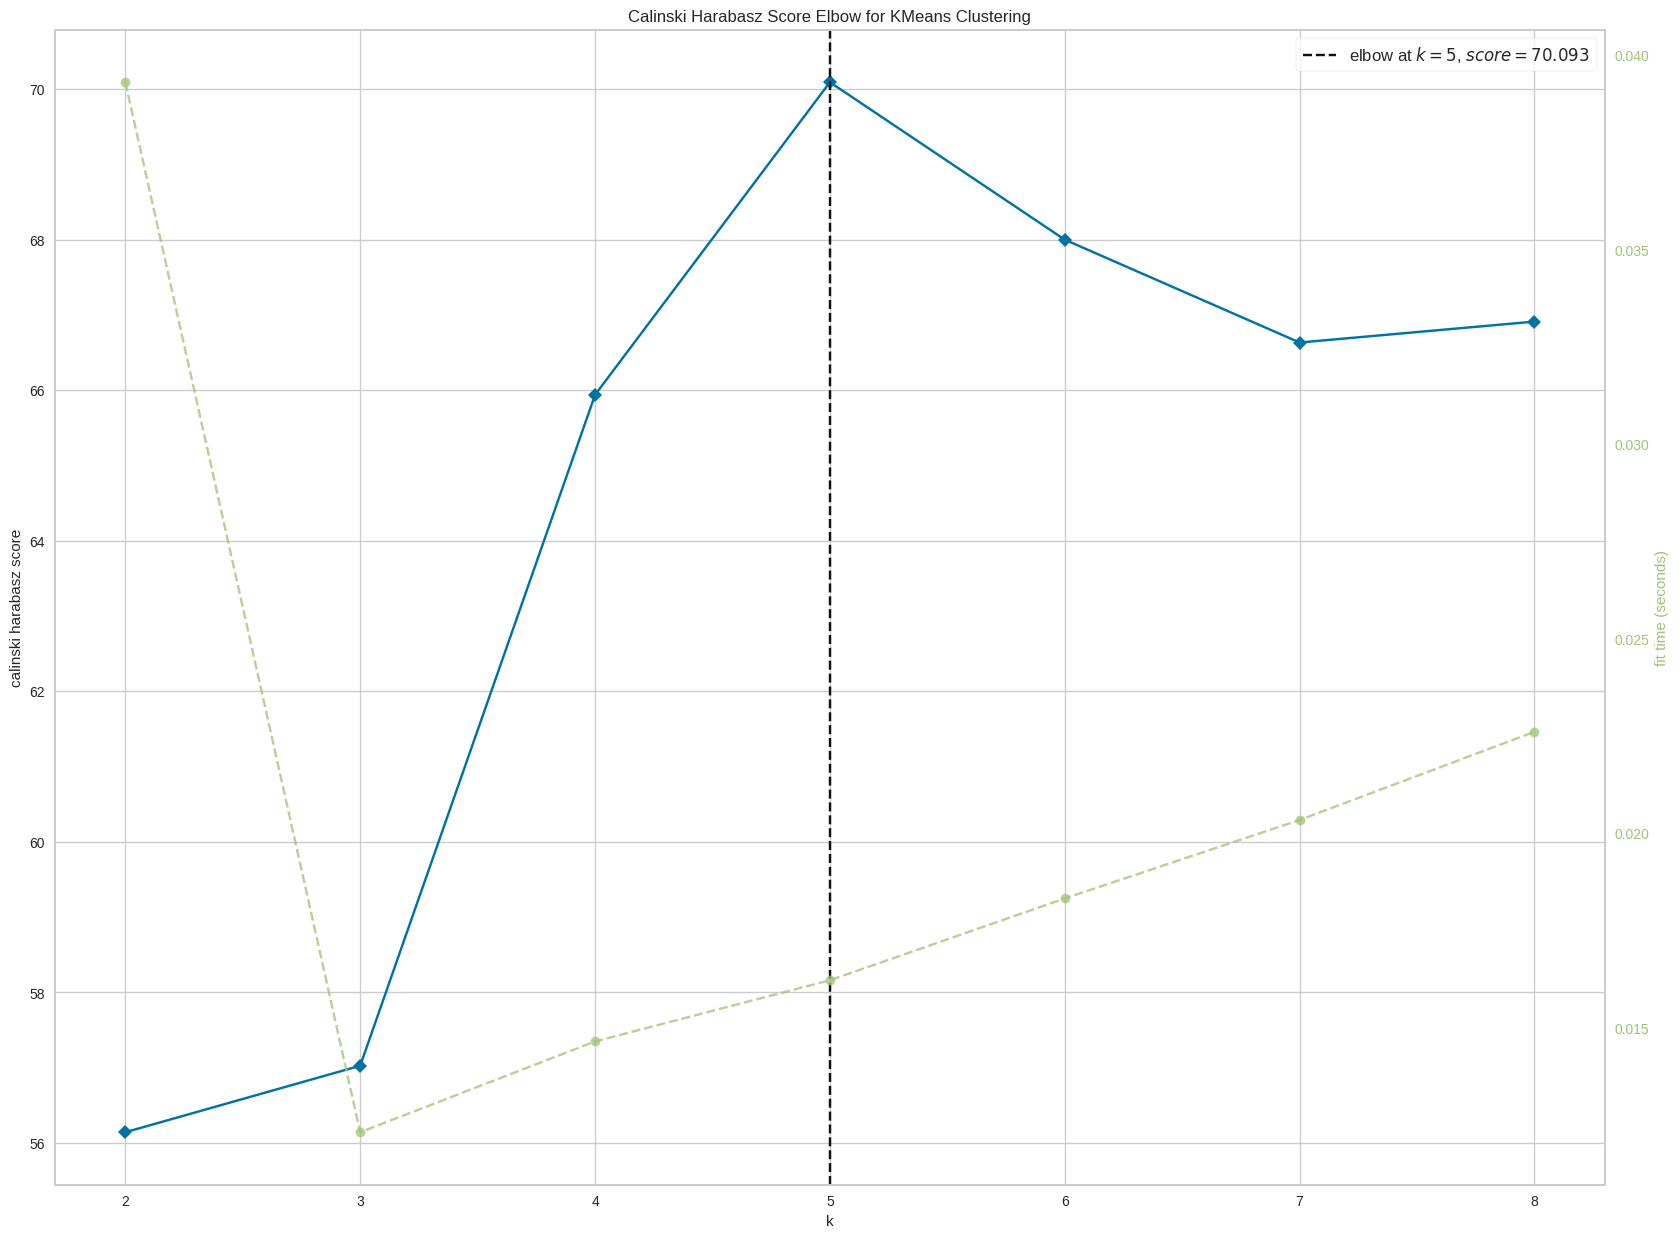

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
# Calinski Harabasz Score Elbow for K Means Clustering
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
# K-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[2 2 2 2 3 3 2 1 1 1 2 1 1 1 1 3 1 3 3 3 1 1 1 1 1 3 3 3 3 1 3 1 1 2 2 1 0
 0 0 2 2 2 2 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2]
66.18900918145474
9
[[-1.26355  1.91563 -0.065    0.18311  0.04079]
 [ 0.86547 -0.55725 -0.23858  0.12909  0.03238]
 [-1.63134 -0.7586   0.0996  -0.13108 -0.02045]
 [ 2.81339  0.3755   0.27431 -0.15603 -0.05659]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# To see each cluster size

Counter(kmeans.labels_)

Counter({2: 20, 3: 11, 1: 18, 0: 11})

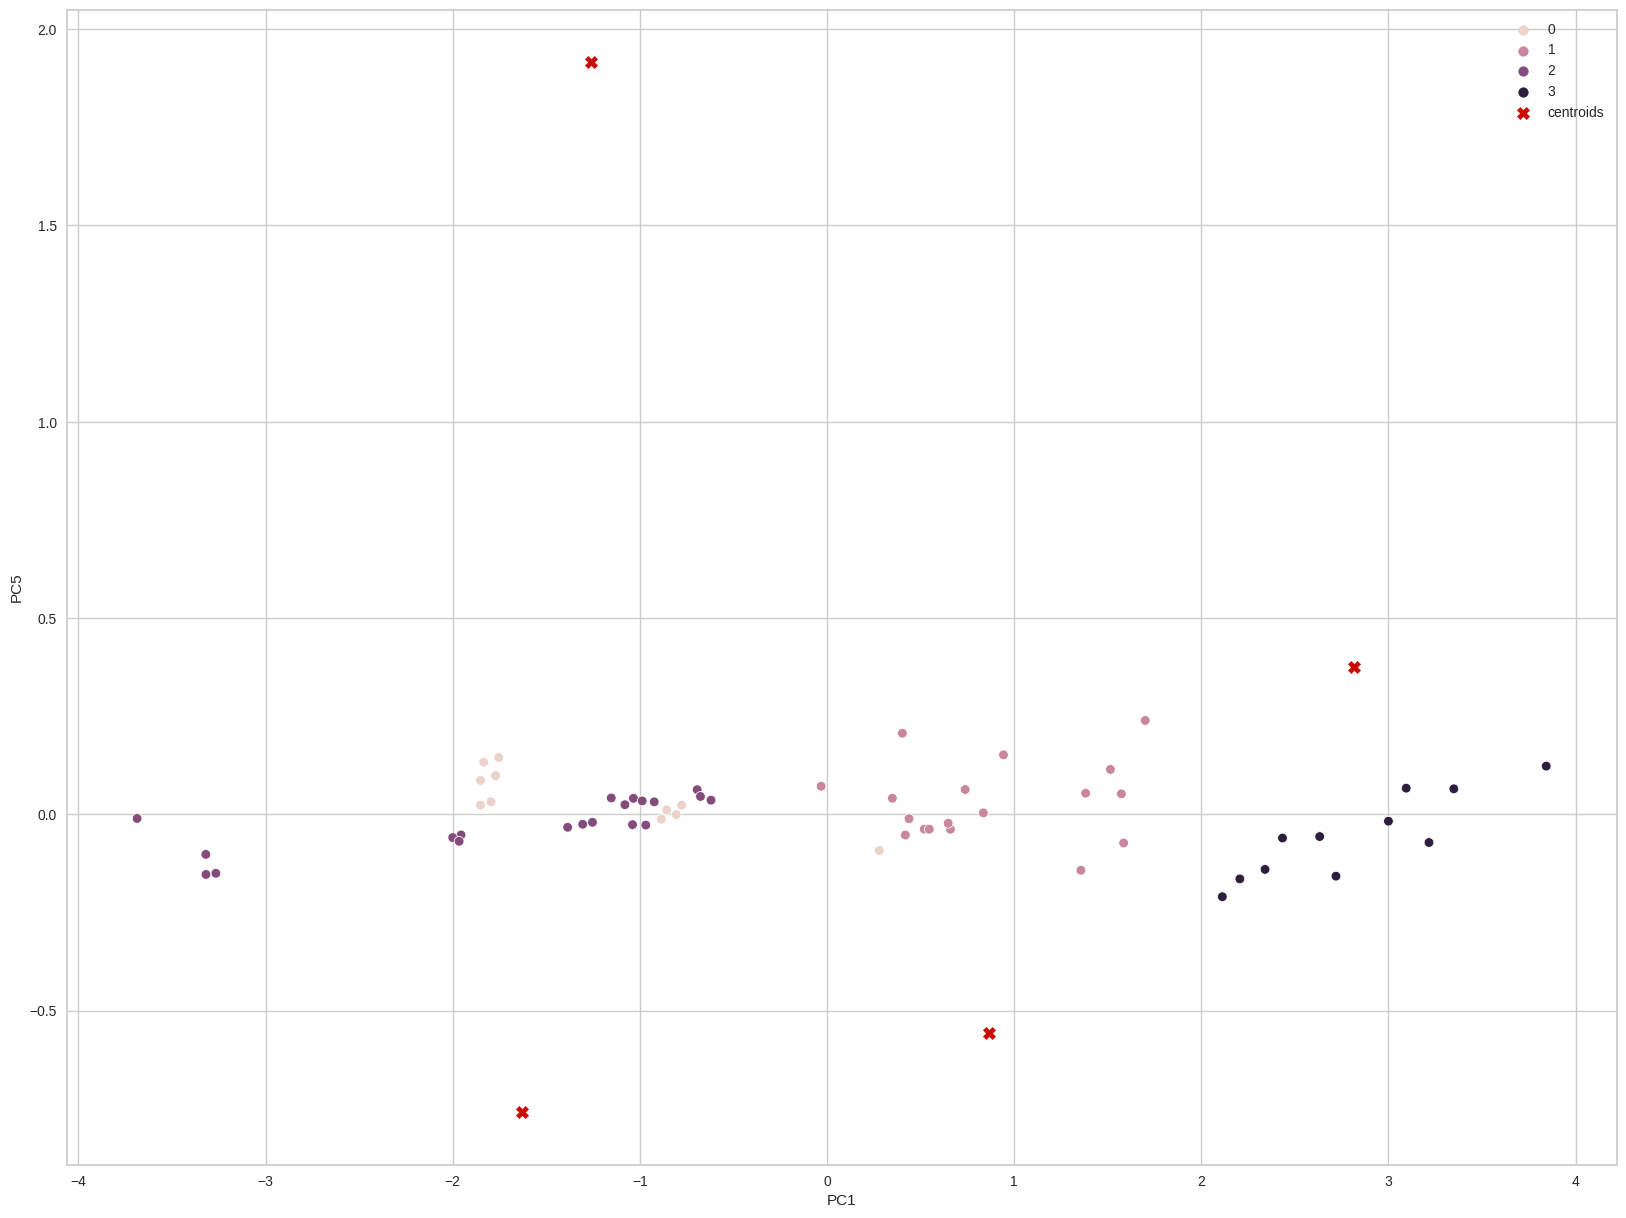

In [ ]:
# Visulaze the clusters
sns.scatterplot(data=data2, x="PC1", y="PC5", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [ ]:
X=data2[['PC1', 'PC2','PC3','PC4','PC5']]
y=data['Price (inEuro)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)

In [ ]:
print(lm.intercept_)

65176.666666666664


In [ ]:
lm.coef_

array([ 15333.83938,   7388.72694,  21955.7461 , -16005.72224,
         2285.44849])

In [ ]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], dtype='object')

In [ ]:
# Cumulative Distribution Function
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

Coeff
PC1  15333.8394
PC2   7388.7269
PC3  21955.7461
PC4 -16005.7222
PC5   2285.4485

In [ ]:
predictions=lm.predict(X_test)
predictions

array([ 51300.,  25000.,  22200.,  75200., 185800.,  97500.,  38100.,
        61100.,  38200., 142700.,  43800.,  43600.,  39700., 104000.,
        41300., 119100.,  49200.,  72900.,  41300.,  73800.,  57900.,
        71100.,  55700.,  48300.])

In [ ]:
y_test

45     51300
57     25000
54     22200
16     75200
26    185800
18     97500
39     38100
21     61100
1      38200
27    142700
33     43800
38     43600
51     39700
24    104000
2      41300
25    119100
53     49200
14     72900
56     41300
22     73800
20     57900
35     71100
7      55700
3      48300
Name: Price (inEuro), dtype: int64

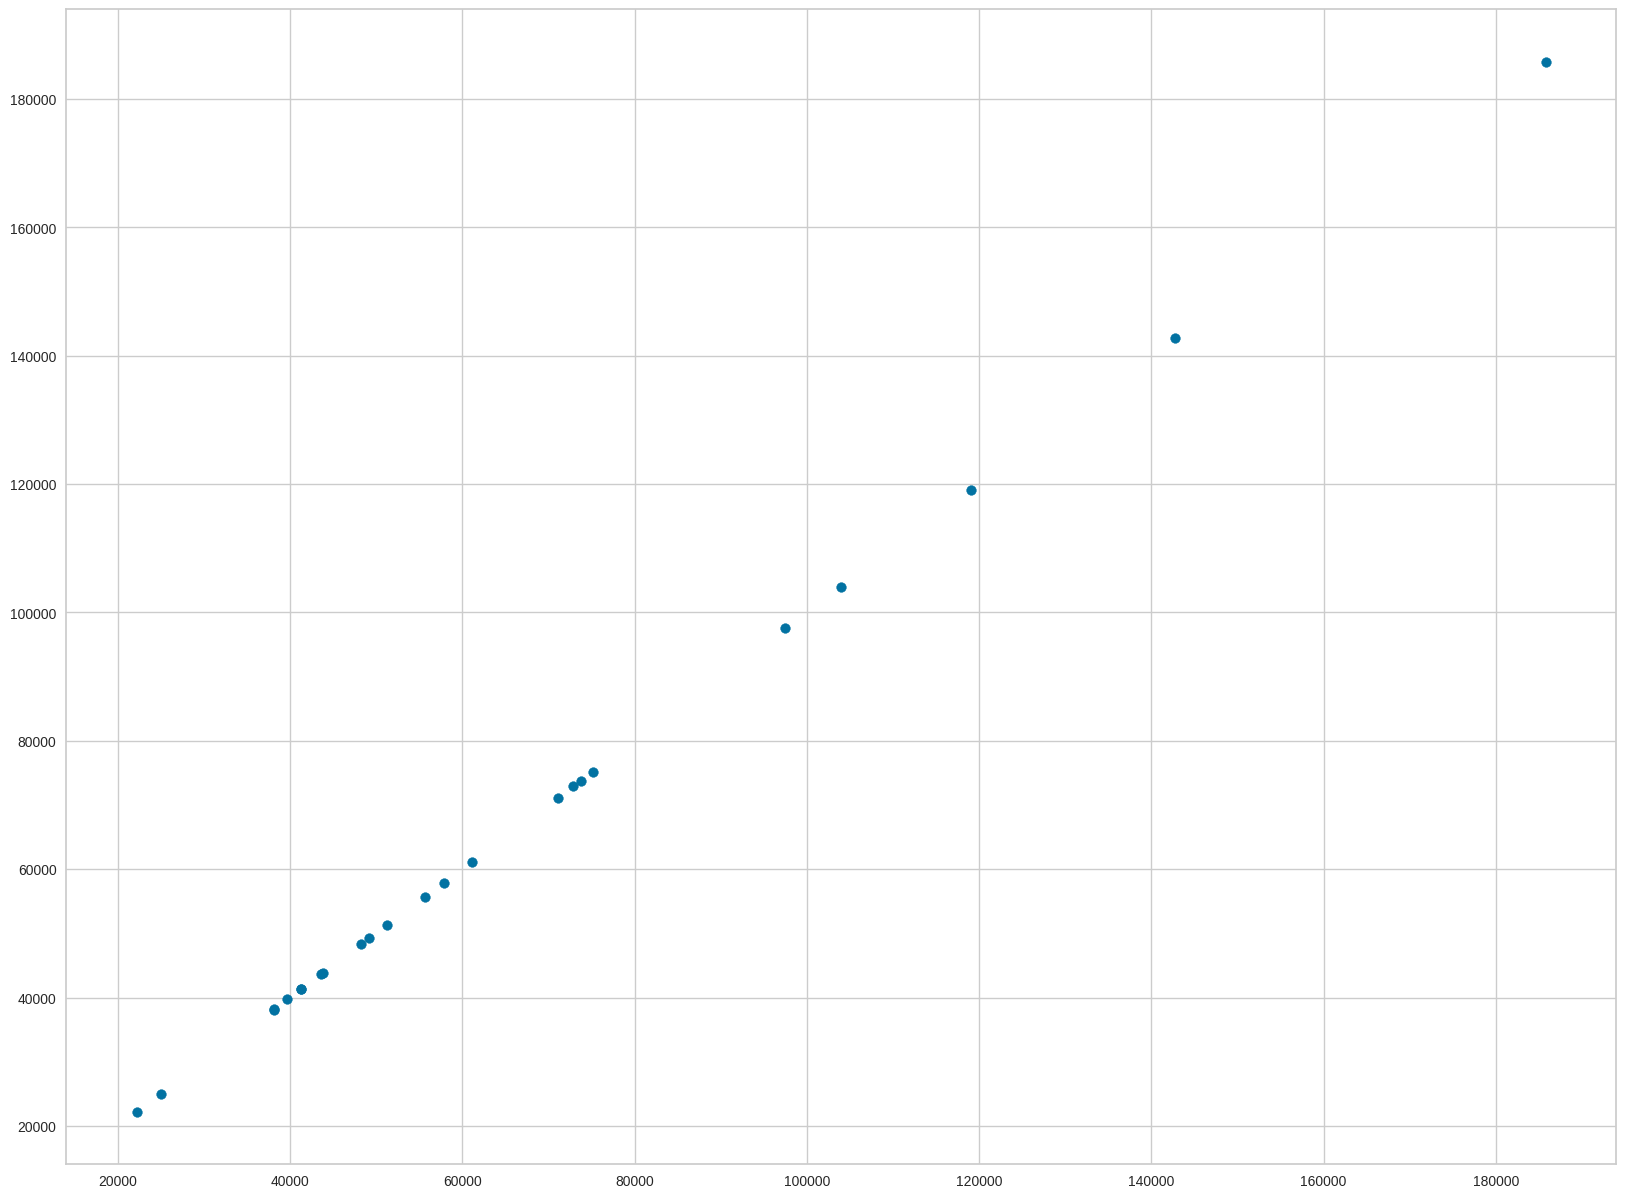

In [ ]:
# Scatter Plot
plt.scatter(y_test, predictions)

<ipython-input-276-8c4c2a51b367>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Price (inEuro)', ylabel='Density'>

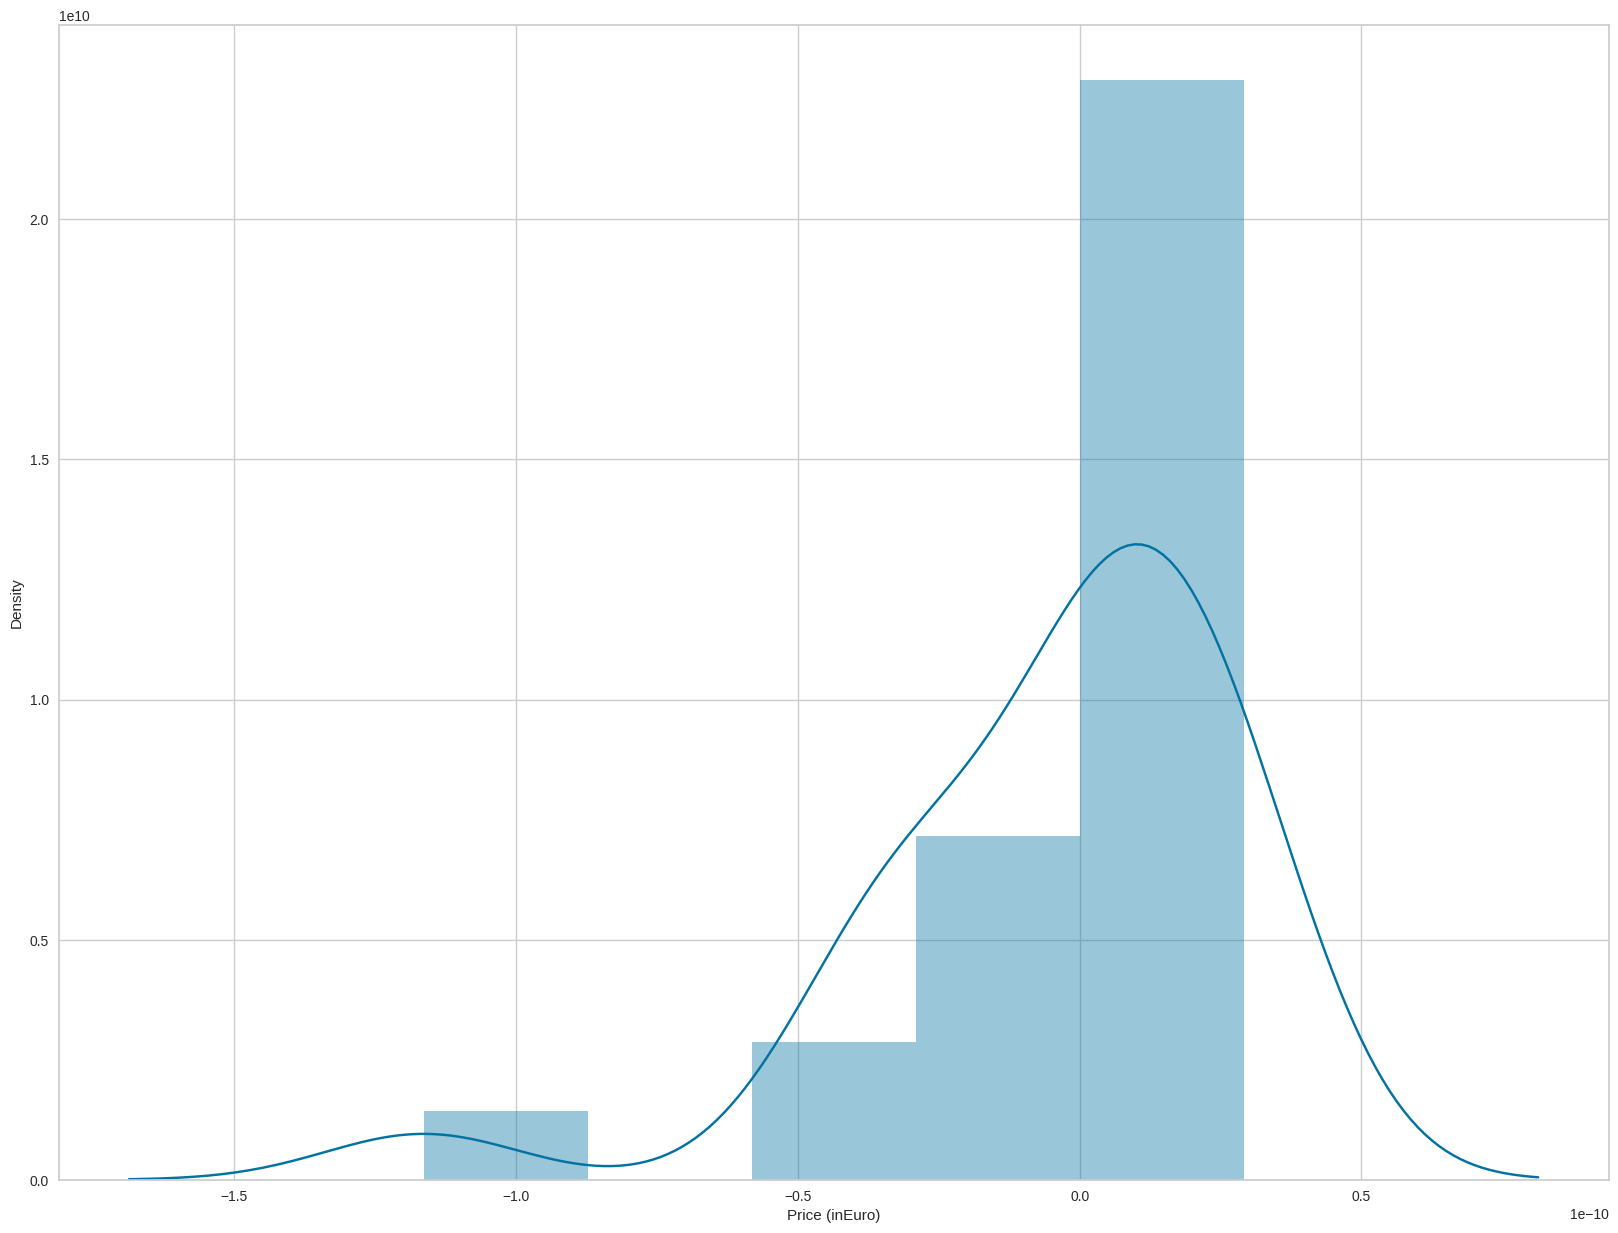

In [ ]:
# Residual histogram plot
sns.distplot((y_test-predictions))

In [ ]:
# Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 2.243420264373223e-11
MSE: 1.0543795541342593e-21
RMSE: 3.247121115902915e-11


In [ ]:
metrics.mean_absolute_error(y_test,predictions)

2.243420264373223e-11

In [ ]:
metrics.mean_squared_error(y_test,predictions)

1.0543795541342593e-21

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

3.247121115902915e-11

In [ ]:
data.columns

Index(['Brand', 'Model', 'Available from', 'Range_km', 'Battery size_kWh',
       'Efficiency_kWh/100km', 'Fastcharge speed_km/h', 'Price (inEuro)'],
      dtype='object')

In [ ]:
#Categorical data

In [ ]:
cat_data=data[['Brand','Model']]

In [ ]:
cat_data

Brand                           Model
0   Abarth 500e                     Convertible
1   Abarth 500e                       Hatchback
2        Aiways                              U5
3        Aiways                              U6
4          Audi               e-tron GT quattro
5          Audi                    e-tron GT RS
6          Audi                    Q4 e-tron 35
7          Audi                    Q4 e-tron 40
8          Audi            Q4 e-tron 45 quattro
9          Audi            Q4 e-tron 50 quattro
10         Audi          Q4 Sportback e-tron 35
11         Audi          Q4 Sportback e-tron 40
12         Audi  Q4 Sportback e-tron 45 quattro
13         Audi  Q4 Sportback e-tron 50 quattro
14         Audi            Q8 e-tron 50 quattro
15         Audi            Q8 e-tron 55 quattro
16         Audi  Q8 e-tron Sportback 50 quattro
17         Audi  Q8 e-tron Sportback 55 quattro
18         Audi                      SQ8 e-tron
19         Audi            SQ8 e-tron Sportback
20          BMW                     i4 eDrive35
21          BMW                     i4 eDrive40
22          BMW                          i4 M50
23          BMW               i5 eDrive40 Sedan
24          BMW             i5 M60 xDrive Sedan
25          BMW                     i7 eDrive50
26          BMW                   i7 M70 xDrive
27          BMW                     i7 xDrive60
28          BMW                          iX M60
29          BMW                     iX xDrive40
30          BMW                     iX xDrive50
31          BMW                    iX1 xDrive30
32          BMW                             iX3
33          BYD                          ATTO 3
34          BYD                DOLPHIN 60.4 kWh
35          BYD                             HAN
36          BYD                            TANG
37      Citroen             e-Berlingo M 50 kWh
38      Citroen            e-Berlingo XL 50 kWh
39      Citroen                            e-C4
40      Citroen                     e-C4 54 kWh
41      Citroen                          e-C4 X
42      Citroen                   e-C4 X 54 kWh
43      Citroen          e-Jumpy Combi M 50 kWh
44      Citroen          e-Jumpy Combi M 75 kWh
45      Citroen         e-Jumpy Combi XL 50 kWh
46      Citroen         e-Jumpy Combi XL 75 kWh
47      Citroen          e-SpaceTourer M 50 kWh
48      Citroen          e-SpaceTourer M 75 kWh
49      Citroen         e-SpaceTourer XL 50 kWh
50      Citroen         e-SpaceTourer XL 75 kWh
51        CUPRA            Born 150 kW - 58 kWh
52        CUPRA            Born 170 kW - 58 kWh
53        CUPRA            Born 170 kW - 77 kWh
54        Dacia              Spring Electric 45
55        Dacia      Spring Electric 65 Extreme
56         DS 3                         E-Tense
57         e.Go                        e.wave X
58         Fiat                 500e 3+1 24 kWh
59         Fiat                 500e 3+1 42 kWh

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Ordinal Encoder
encoder=OrdinalEncoder()
result=encoder.fit_transform(cat_data)
print(result)

[[ 0.  6.]
 [ 0. 10.]
 [ 1. 28.]
 [ 1. 29.]
 [ 2. 45.]
 [ 2. 44.]
 [ 2. 15.]
 [ 2. 16.]
 [ 2. 17.]
 [ 2. 18.]
 [ 2. 11.]
 [ 2. 12.]
 [ 2. 13.]
 [ 2. 14.]
 [ 2. 19.]
 [ 2. 20.]
 [ 2. 21.]
 [ 2. 22.]
 [ 2. 23.]
 [ 2. 24.]
 [ 3. 48.]
 [ 3. 49.]
 [ 3. 47.]
 [ 3. 51.]
 [ 3. 50.]
 [ 3. 53.]
 [ 3. 52.]
 [ 3. 54.]
 [ 3. 55.]
 [ 3. 56.]
 [ 3. 57.]
 [ 3. 58.]
 [ 3. 59.]
 [ 4.  2.]
 [ 4.  7.]
 [ 4.  9.]
 [ 4. 27.]
 [ 6. 30.]
 [ 6. 31.]
 [ 6. 32.]
 [ 6. 33.]
 [ 6. 34.]
 [ 6. 35.]
 [ 6. 36.]
 [ 6. 37.]
 [ 6. 38.]
 [ 6. 39.]
 [ 6. 40.]
 [ 6. 41.]
 [ 6. 42.]
 [ 6. 43.]
 [ 5.  3.]
 [ 5.  4.]
 [ 5.  5.]
 [ 8. 25.]
 [ 8. 26.]
 [ 7.  8.]
 [10. 46.]
 [ 9.  0.]
 [ 9.  1.]]


In [ ]:
temp = ['Brand','Model']
data.drop(temp, axis=1)
result = pd.DataFrame(result)
result.columns=['Brand','Model']
result.index+=1
result

Brand   Model
1   0.0000  6.0000
2   0.0000 10.0000
3   1.0000 28.0000
4   1.0000 29.0000
5   2.0000 45.0000
6   2.0000 44.0000
7   2.0000 15.0000
8   2.0000 16.0000
9   2.0000 17.0000
10  2.0000 18.0000
11  2.0000 11.0000
12  2.0000 12.0000
13  2.0000 13.0000
14  2.0000 14.0000
15  2.0000 19.0000
16  2.0000 20.0000
17  2.0000 21.0000
18  2.0000 22.0000
19  2.0000 23.0000
20  2.0000 24.0000
21  3.0000 48.0000
22  3.0000 49.0000
23  3.0000 47.0000
24  3.0000 51.0000
25  3.0000 50.0000
26  3.0000 53.0000
27  3.0000 52.0000
28  3.0000 54.0000
29  3.0000 55.0000
30  3.0000 56.0000
31  3.0000 57.0000
32  3.0000 58.0000
33  3.0000 59.0000
34  4.0000  2.0000
35  4.0000  7.0000
36  4.0000  9.0000
37  4.0000 27.0000
38  6.0000 30.0000
39  6.0000 31.0000
40  6.0000 32.0000
41  6.0000 33.0000
42  6.0000 34.0000
43  6.0000 35.0000
44  6.0000 36.0000
45  6.0000 37.0000
46  6.0000 38.0000
47  6.0000 39.0000
48  6.0000 40.0000
49  6.0000 41.0000
50  6.0000 42.0000
51  6.0000 43.0000
52  5.0000  3.0000
53  5.0000  4.0000
54  5.0000  5.0000
55  8.0000 25.0000
56  8.0000 26.0000
57  7.0000  8.0000
58 10.0000 46.0000
59  9.0000  0.0000
60  9.0000  1.0000

In [ ]:
cat_data = data
cat_data.index+=1
cat_data[['Brand', 'Model']] = result[['Brand', 'Model']]
data

Brand   Model Available from  Range_km  Battery size_kWh  \
1   0.0000  6.0000     2023-05-01       225           37.8000   
2   0.0000 10.0000     2023-05-01       225           37.8000   
3   1.0000 28.0000     2022-04-01       315           60.0000   
4   1.0000 29.0000     2022-12-01       350           60.0000   
5   2.0000 45.0000     2021-03-01       420           85.0000   
6   2.0000 44.0000     2021-03-01       405           85.0000   
7   2.0000 15.0000     2021-06-01       285           52.0000   
8   2.0000 16.0000     2021-06-01       405           76.6000   
9   2.0000 17.0000     2021-08-01       385           76.6000   
10  2.0000 18.0000     2021-07-01       385           76.6000   
11  2.0000 11.0000     2021-08-01       295           52.0000   
12  2.0000 12.0000     2021-08-01       425           76.6000   
13  2.0000 13.0000     2022-07-01       400           76.6000   
14  2.0000 14.0000     2021-08-01       400           76.6000   
15  2.0000 19.0000     2022-12-01       420           89.0000   
16  2.0000 20.0000     2022-12-01       495          106.0000   
17  2.0000 21.0000     2022-12-01       445           89.0000   
18  2.0000 22.0000     2022-12-01       525          106.0000   
19  2.0000 23.0000     2023-05-01       455          106.0000   
20  2.0000 24.0000     2023-05-01       480          106.0000   
21  3.0000 48.0000     2022-11-01       430           67.0000   
22  3.0000 49.0000     2021-11-01       515           80.7000   
23  3.0000 47.0000     2021-11-01       450           80.7000   
24  3.0000 51.0000     2023-05-01       475           81.2000   
25  3.0000 50.0000     2023-05-01       425           81.2000   
26  3.0000 53.0000     2023-05-01       520          101.7000   
27  3.0000 52.0000     2023-05-01       490          101.7000   
28  3.0000 54.0000     2022-11-01       510          101.7000   
29  3.0000 55.0000     2022-04-01       485          105.2000   
30  3.0000 56.0000     2021-10-01       360           71.0000   
31  3.0000 57.0000     2021-11-01       505          105.2000   
32  3.0000 58.0000     2022-11-01       370           64.7000   
33  3.0000 59.0000     2021-09-01       385           74.0000   
34  4.0000  2.0000     2022-08-01       325           60.5000   
35  4.0000  7.0000     2023-07-01       340           60.5000   
36  4.0000  9.0000     2023-03-01       475           85.4000   
37  4.0000 27.0000     2022-08-01       360           86.4000   
38  6.0000 30.0000     2021-09-01       205           46.3000   
39  6.0000 31.0000     2021-09-01       205           46.3000   
40  6.0000 32.0000     2021-11-01       290           46.3000   
41  6.0000 33.0000     2023-06-01       320           50.8000   
42  6.0000 34.0000     2022-11-01       275           46.3000   
43  6.0000 35.0000     2023-06-01       305           50.8000   
44  6.0000 36.0000     2020-11-01       185           46.3000   
45  6.0000 37.0000     2020-11-01       265           68.0000   
46  6.0000 38.0000     2020-11-01       180           46.3000   
47  6.0000 39.0000     2020-11-01       260           68.0000   
48  6.0000 40.0000     2020-11-01       185           46.3000   
49  6.0000 41.0000     2021-02-01       265           68.0000   
50  6.0000 42.0000     2020-11-01       180           46.3000   
51  6.0000 43.0000     2021-02-01       260           68.0000   
52  5.0000  3.0000     2021-10-01       350           58.0000   
53  5.0000  4.0000     2022-03-01       345           58.0000   
54  5.0000  5.0000     2022-03-01       450           77.0000   
55  8.0000 25.0000     2022-07-01       165           25.0000   
56  8.0000 26.0000     2023-01-01       160           25.0000   
57  7.0000  8.0000     2022-11-01       300           50.8000   
58 10.0000 46.0000     2022-12-01       150           27.0000   
59  9.0000  0.0000     2022-07-01       135           21.3000   
60  9.0000  1.0000     2020-11-01       235           37.3000   

    Efficiency_kWh/100km  Fastcharge sp